In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from pandas import Timestamp
from ggplot import *

In [3]:
telecom =pd.read_csv('Telecom-Usage-Details.csv') 
telecom.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

## Data overview

In [4]:
print ("Rows           =",telecom.shape[0])
print ("Columns        =",telecom.shape[1])
print ("\nFeatures       =\n  ",telecom.columns.to_list())
print ("\nNull Vlaues    =",telecom.isnull().sum().values.sum())
print ("\nunique Vlaues  =\n",telecom.nunique())

Rows           = 7043
Columns        = 21

Features       =
   ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Null Vlaues    = 0

unique Vlaues  =
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Data Manipulation

In [5]:
telecom["TotalCharges"] = telecom["TotalCharges"].replace(" ",np.nan)
telecom = telecom[telecom["TotalCharges"].notnull()]
telecom = telecom.reset_index()[telecom.columns]

In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
telecom["TotalCharges"] = telecom["TotalCharges"].astype(float) 

In [8]:
telecom["TotalCharges"].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [9]:
telecom["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [10]:
#replace 'No internet service' to 'No' for the following columns
replace_columns = ["OnlineSecurity",'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

In [11]:
for i in replace_columns:
    telecom[i] = telecom[i].replace({"No internet service" : "No"}) 

In [12]:
telecom["OnlineSecurity"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
telecom["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [14]:
telecom["SeniorCitizen"] = telecom["SeniorCitizen"].replace({0 : "No" , 1 : "Yes"})

In [15]:
telecom["SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
telecom["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [17]:
telecom["tenure"].min()

1

In [18]:
telecom["tenure"].max()

72

In [19]:
def Tenure_years(telecom):
    if   telecom['tenure'] <= 12:
        return 1
    elif (telecom['tenure'] > 12) & (telecom['tenure'] <= 24):
        return 2
    elif (telecom['tenure'] > 24) & (telecom['tenure'] <= 36):
        return 3
    elif (telecom['tenure'] > 36) & (telecom['tenure'] <= 48):
        return 4
    elif (telecom['tenure'] > 48) & (telecom['tenure'] <= 60):
        return 5
    else:
        return 6

In [20]:
telecom["tenure_years"] = telecom.apply(lambda telecom:Tenure_years(telecom),axis = 1)

In [21]:
telecom["tenure_years"].unique()

array([1, 3, 4, 2, 6, 5], dtype=int64)

In [22]:
## chnage months to years , now we have 6 values instead of 72.

In [23]:
## Separate churn and not churn
churn     = telecom[telecom["Churn"] == "Yes"]
not_churn = telecom[telecom["Churn"] == "No"]

In [24]:
churn.shape

(1869, 22)

In [25]:
not_churn.shape

(5163, 22)

In [26]:
target_col = ['Churn']
ID_col = ["customerID"]

In [27]:
cat_cols   = telecom.nunique()[telecom.nunique() < 6].keys().tolist()

In [28]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [29]:
# Separate catagorical and numerical columns
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telecom.columns if x not in cat_cols + target_col + ID_col]

In [30]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [31]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure_years']

In [32]:
labels = telecom["Churn"].value_counts().keys().tolist()

In [33]:
len(labels)

2

In [34]:
labels

['No', 'Yes']

In [35]:
from scipy import stats
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
sns.set_style(style='whitegrid')

In [36]:
def showtable(df):
    '''
    Returns few key metrics of a dataframe.
    '''
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [37]:
showtable(telecom)

Dataset Shape: (7032, 22)


Name   dtypes  Missing  Uniques       First Value  \
0         customerID   object        0     7032        7590-VHVEG   
1             gender   object        0        2            Female   
2      SeniorCitizen   object        0        2                No   
3            Partner   object        0        2               Yes   
4         Dependents   object        0        2                No   
5             tenure    int64        0       72                 1   
6       PhoneService   object        0        2                No   
7      MultipleLines   object        0        3  No phone service   
8    InternetService   object        0        3               DSL   
9     OnlineSecurity   object        0        2                No   
10      OnlineBackup   object        0        2               Yes   
11  DeviceProtection   object        0        2                No   
12       TechSupport   object        0        2                No   
13       StreamingTV   object        0        2                No   
14   StreamingMovies   object        0        2                No   
15          Contract   object        0        3    Month-to-month   
16  PaperlessBilling   object        0        2               Yes   
17     PaymentMethod   object        0        4  Electronic check   
18    MonthlyCharges  float64        0     1584             29.85   
19      TotalCharges  float64        0     6530             29.85   
20             Churn   object        0        2                No   
21      tenure_years    int64        0        6                 1   

    Second Value     Third Value  Entropy  
0     5575-GNVDE      3668-QPYBK    12.78  
1           Male            Male     1.00  
2             No              No     0.64  
3             No              No     1.00  
4             No              No     0.88  
5             34               2     5.91  
6            Yes             Yes     0.46  
7             No              No     1.36  
8            DSL             DSL     1.53  
9            Yes             Yes     0.86  
10            No             Yes     0.93  
11           Yes              No     0.93  
12            No              No     0.87  
13            No              No     0.96  
14            No              No     0.96  
15      One year  Month-to-month     1.44  
16            No             Yes     0.98  
17  Mailed check    Mailed check     1.97  
18         56.95           53.85    10.04  
19        1889.5          108.15    12.61  
20            No             Yes     0.84  
21             3               1     2.47

In [38]:
'''
customerID Customer ID
gender Whether the customer is a male or a female
SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
Partner Whether the customer has a partner or not (Yes, No)
Dependents Whether the customer has dependents or not (Yes, No)
tenure Number of months the customer has stayed with the company
PhoneService Whether the customer has a phone service or not (Yes, No)
MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges The amount charged to the customer monthly
TotalCharges The total amount charged to the customer
Churn Whether the customer churned or not (Yes or No)
'''

'\ncustomerID Customer ID\ngender Whether the customer is a male or a female\nSeniorCitizen Whether the customer is a senior citizen or not (1, 0)\nPartner Whether the customer has a partner or not (Yes, No)\nDependents Whether the customer has dependents or not (Yes, No)\ntenure Number of months the customer has stayed with the company\nPhoneService Whether the customer has a phone service or not (Yes, No)\nMultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)\nInternetService Customer’s internet service provider (DSL, Fiber optic, No)\nOnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)\nOnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)\nDeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)\nTechSupport Whether the customer has tech support or not (Yes, No, No internet service)\nStreamingTV Whether the customer has streaming 

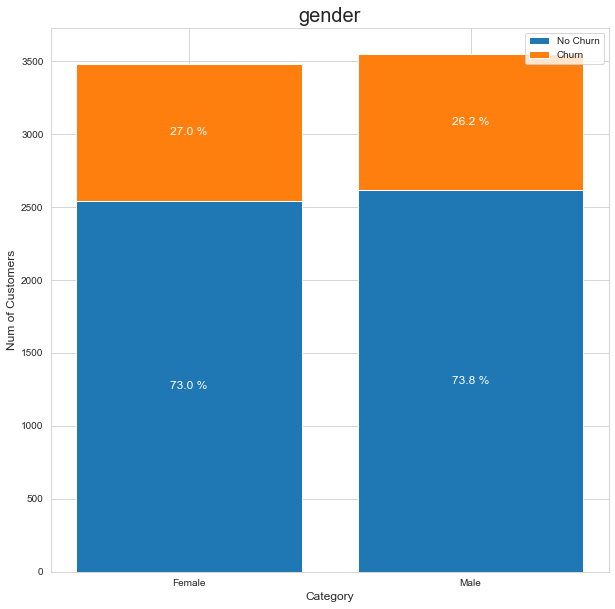

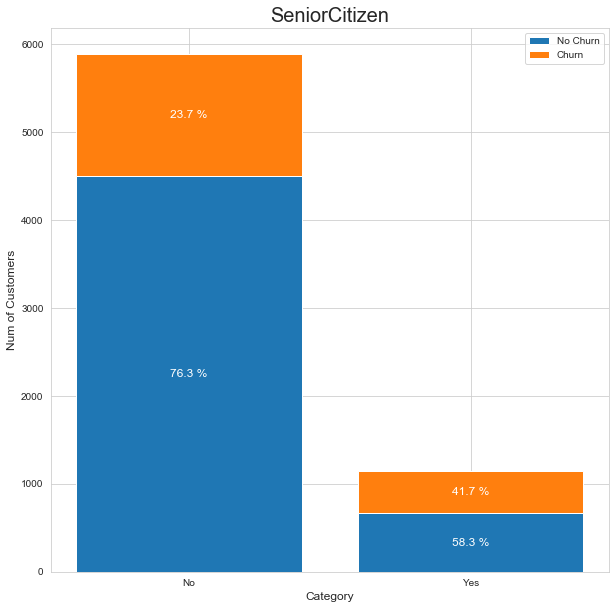

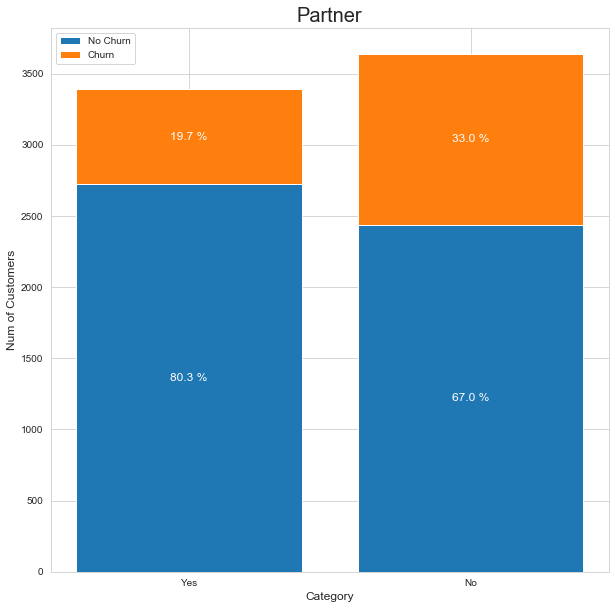

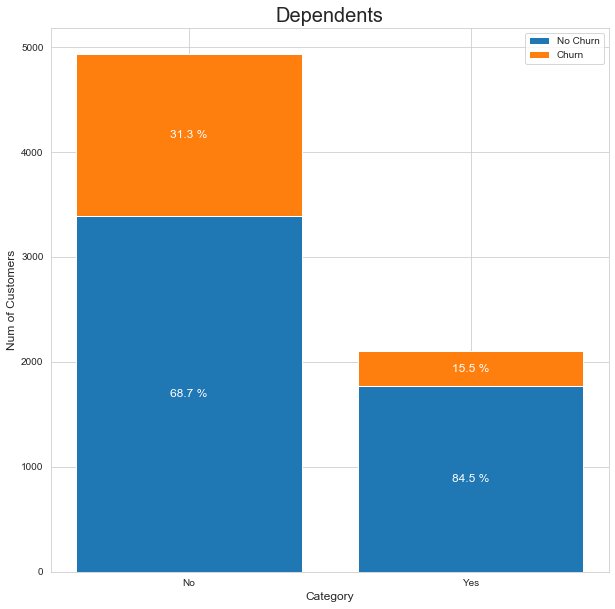

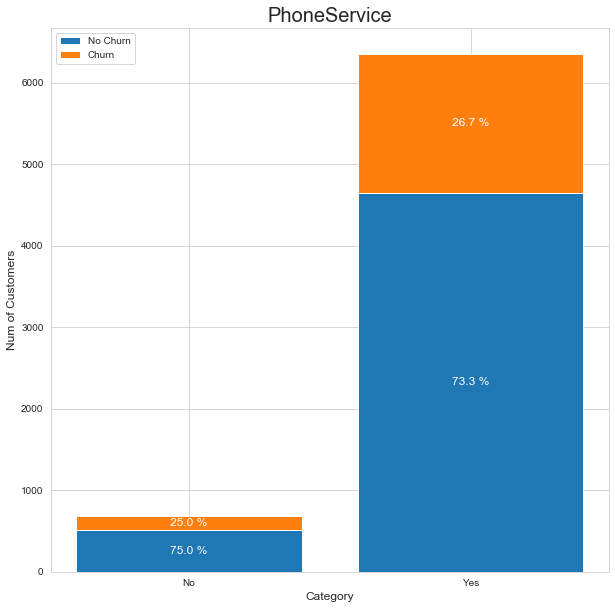

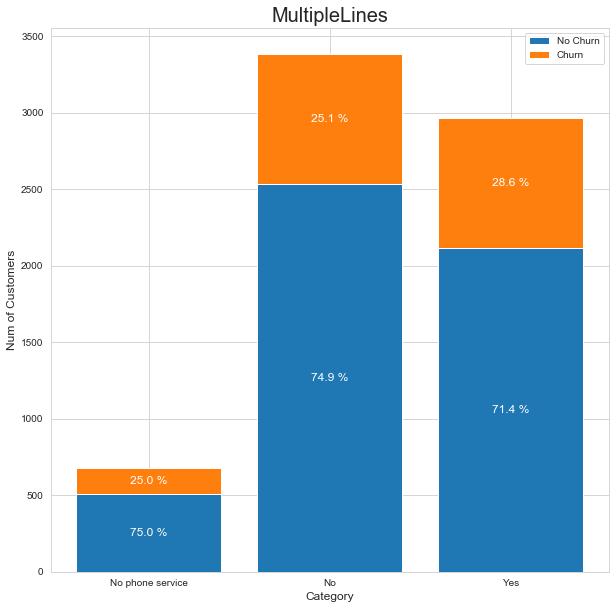

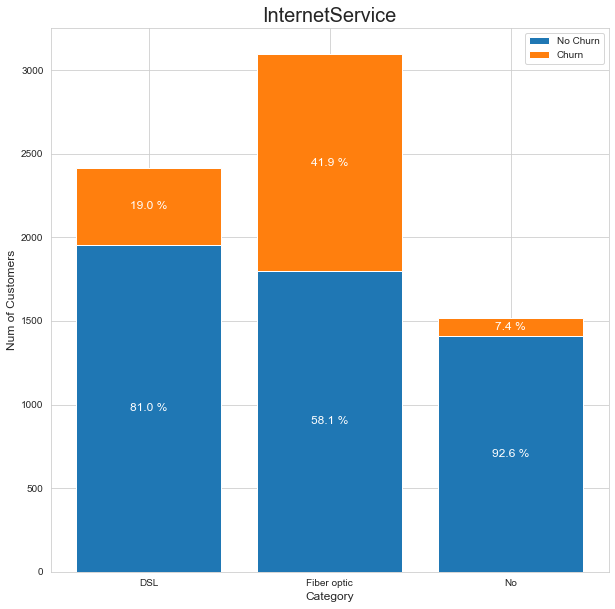

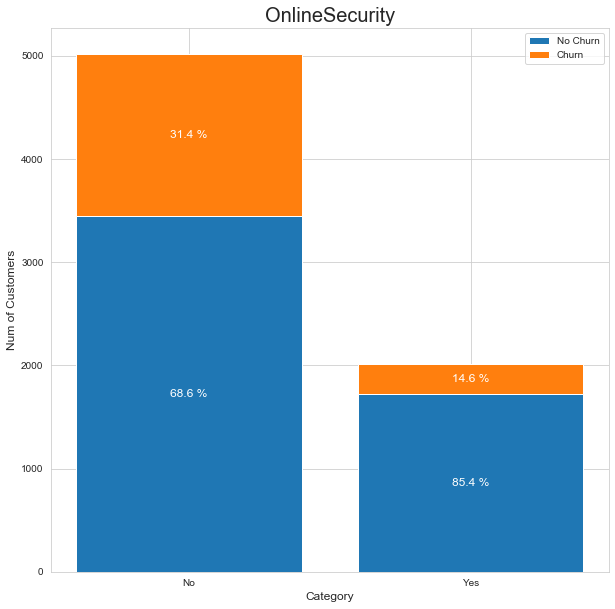

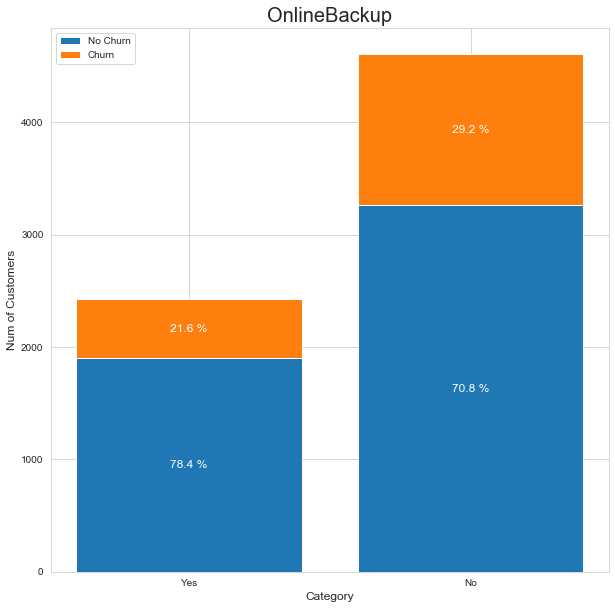

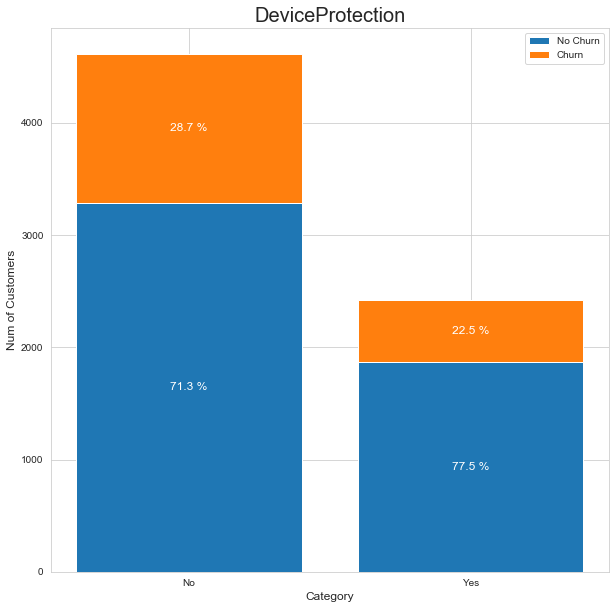

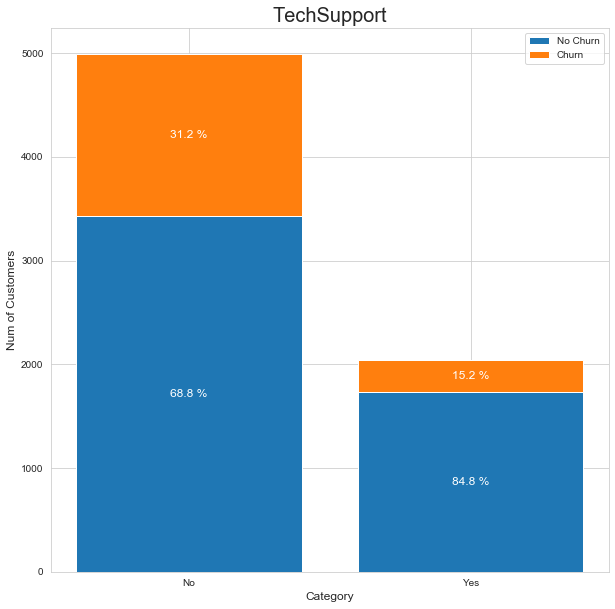

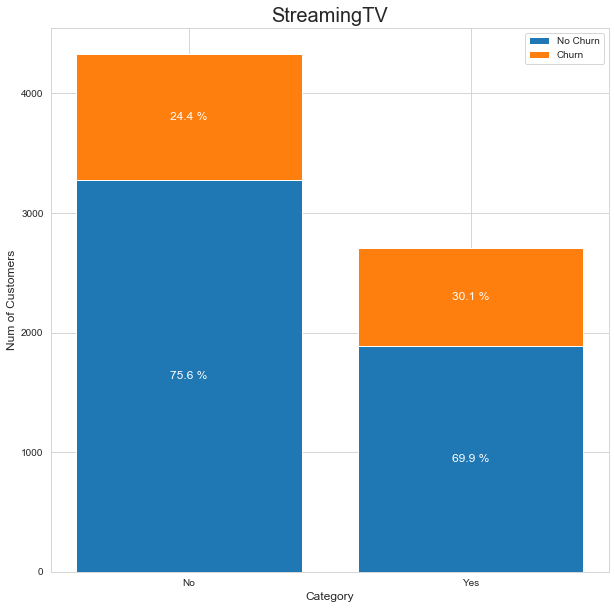

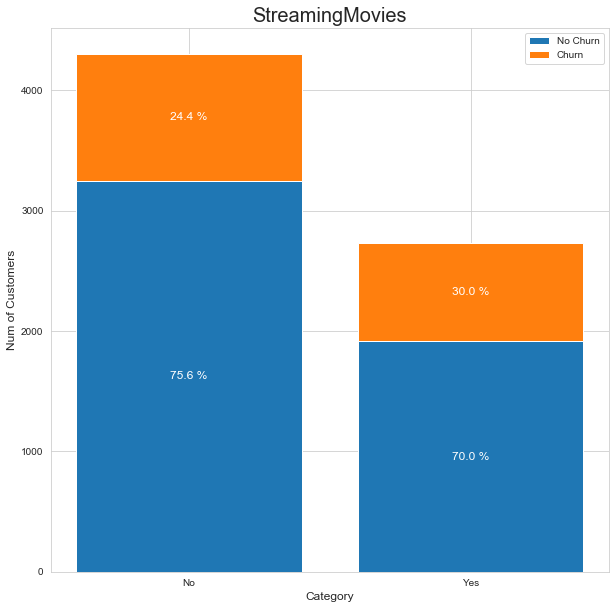

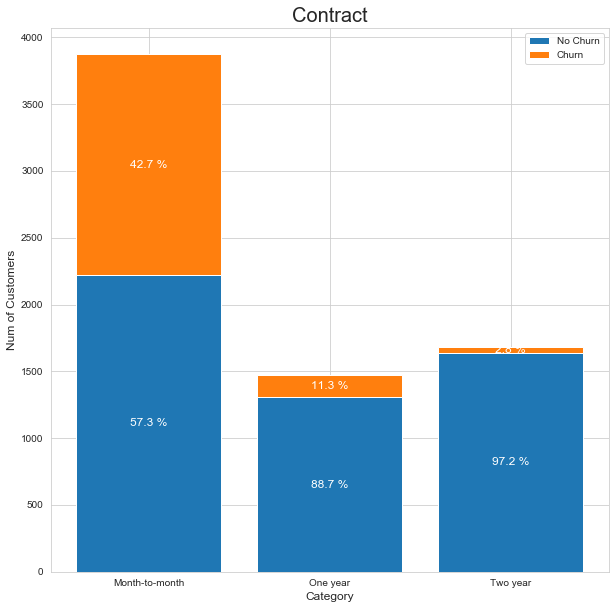

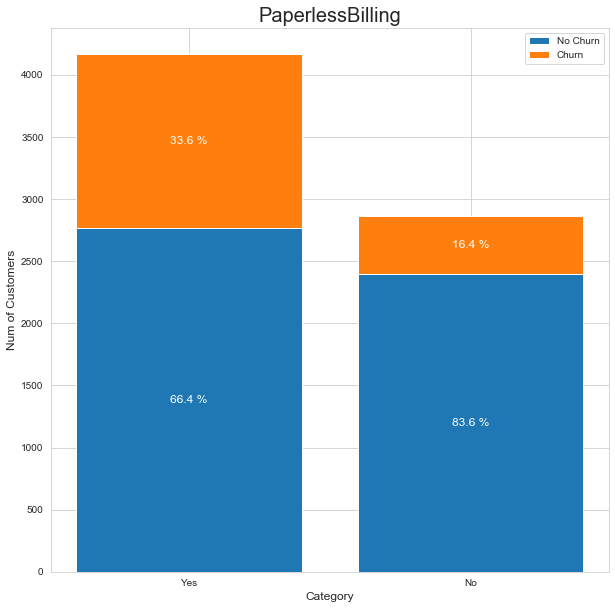

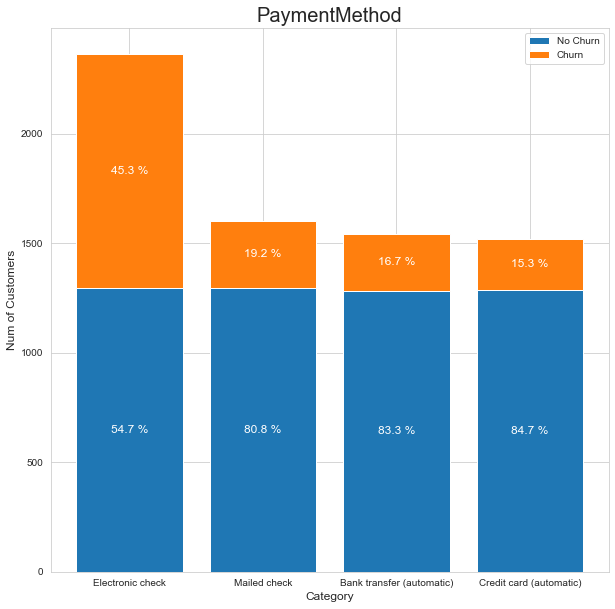

In [39]:
for col in cat_cols:
    fig,ax = plt.subplots(figsize=(10,10))
    churn_no = []
    churn_yes = []
    x = []
    for i in telecom[col].unique():
        #each category has a sub-category : e.g. Gender has Male and Female
        churn_no.append(telecom.groupby([col,'Churn']).size()[i][0])
        churn_yes.append(telecom.groupby([col,'Churn']).size()[i][1])
        x.append(i)
        
    plot_1 = plt.bar(x,churn_no)
    plot_2 = plt.bar(x,churn_yes,bottom = churn_no)
        
    for r1,r2, in zip(plot_1,plot_2):
        height1 = r1.get_height()
        height2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., #x
                 height1 / 2., #y
                 f'{round(height1 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)
        plt.text(r2.get_x() + r2.get_width() / 2., #x
                 height1 + height2 / 2., #y
                 f'{round(height2 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)
    
    plt.xlabel("Category",fontsize=12)
    plt.ylabel("Num of Customers",fontsize=12)
    plt.legend(["No Churn","Churn"])
    plt.title(col,fontsize = 20)
    plt.show()

In [40]:
"""
Gender: Gender has almost a 50/50 split and negligible difference in churn percentages.
Senior Citizens: Senior citizens have close to double the rate of churn; however, they make up only 1/6th of the total customer population
Partner: The split between population is almost equal with ~3,500 customers in each group. The percentage of customers that churn, however, is 30% higher if the customer is without a partner.
Dependents: Customers are more likely to churn if they have no dependents, however, the split in customers based on dependents is imbalanced.
Phone Service: Rate of churn is similar regardless whether a customer has phone service or not.
Multiple Lines: of the customers that have phone service, the ones that have multiple lines have similar churn rates of those who only have one line.
Internet Service: Out of the customers that have internet service, customers with Fiber Optic service have double the rate of churn than those with DSL.
Online Security: Of the customers that have internet service, ones without online security have a triple the churn rate than those who opted in for online security. May be worth investigating this feature further.
Online Backup / Device Protection: Of the customers that have internet service, customers with these features have half the rate of churn than those that don’t
Tech Support: Of the customers that have internet service, those that use tech support have a significantly lower rate of churn. Note, the number of customers that use tech support is significantly less than those who don’t.
Streaming TV / Streaming Movies: Of the customers that have internet service, no significant change in churn rate can be seen whether a customer uses the streaming service.
Contract: Customers on contract have significantly lower churn rates than those that are month to month. This is expected.
Paperless Billing: Customers on paperless billing have higher rates of churn.
Payment Method: Electronic Check customers have double the rate of churn than those using other payment methods.
"""

'\nGender: Gender has almost a 50/50 split and negligible difference in churn percentages.\nSenior Citizens: Senior citizens have close to double the rate of churn; however, they make up only 1/6th of the total customer population\nPartner: The split between population is almost equal with ~3,500 customers in each group. The percentage of customers that churn, however, is 30% higher if the customer is without a partner.\nDependents: Customers are more likely to churn if they have no dependents, however, the split in customers based on dependents is imbalanced.\nPhone Service: Rate of churn is similar regardless whether a customer has phone service or not.\nMultiple Lines: of the customers that have phone service, the ones that have multiple lines have similar churn rates of those who only have one line.\nInternet Service: Out of the customers that have internet service, customers with Fiber Optic service have double the rate of churn than those with DSL.\nOnline Security: Of the custom

In [41]:
telecom["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure_years']

Text(0, 0.5, 'customers')

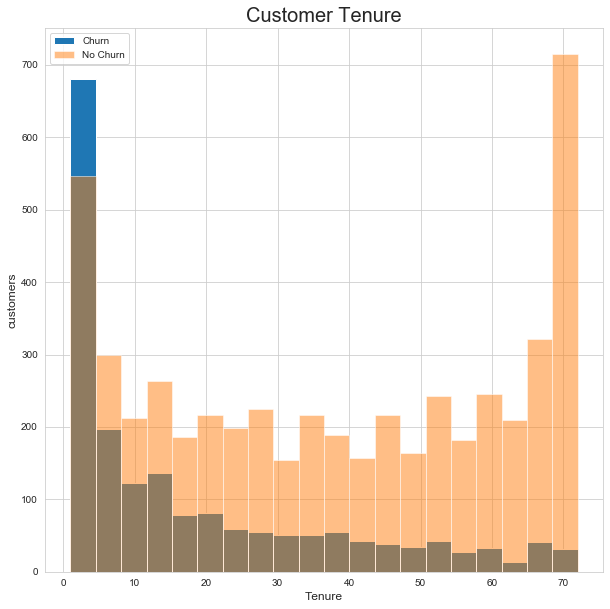

In [43]:
fig,ax = plt.subplots(figsize=(10,10))
telecom.tenure[telecom.Churn == "Yes"].hist(bins = 20)
telecom.tenure[telecom.Churn == "No"].hist(bins = 20 , alpha= 0.5)
plt.legend(["Churn",'No Churn'])
plt.title("Customer Tenure",fontsize=20)
plt.xlabel("Tenure",fontsize=12)
plt.ylabel("customers",fontsize=12)

Text(0, 0.5, 'customers')

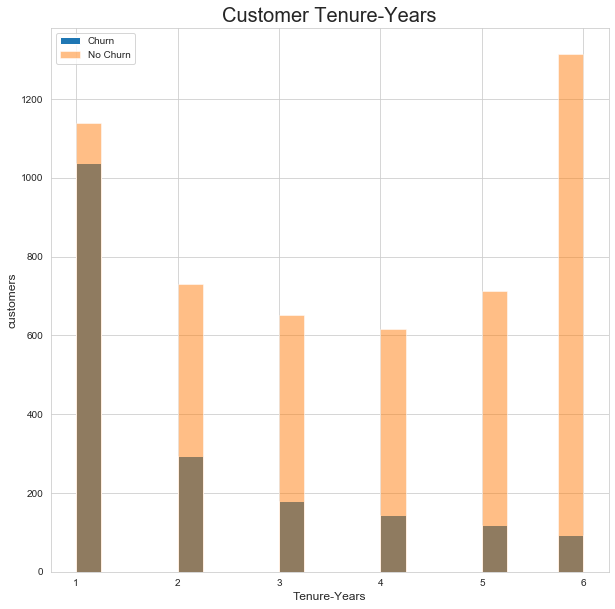

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
telecom.tenure_years[telecom.Churn == "Yes"].hist(bins = 20)
telecom.tenure_years[telecom.Churn == "No"].hist(bins = 20 , alpha= 0.5)
plt.legend(["Churn",'No Churn'])
plt.title("Customer Tenure-Years",fontsize=20)
plt.xlabel("Tenure-Years",fontsize=12)
plt.ylabel("customers",fontsize=12)

Text(0, 0.5, 'customers')

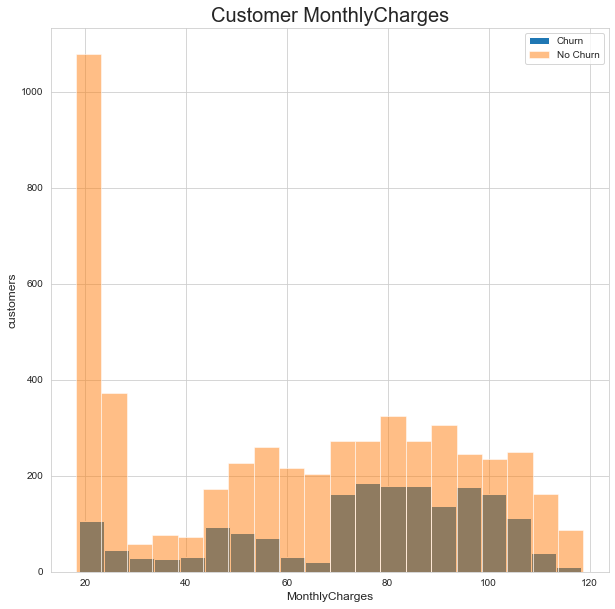

In [45]:
fig,ax = plt.subplots(figsize=(10,10))
telecom.MonthlyCharges[telecom.Churn == "Yes"].hist(bins = 20)
telecom.MonthlyCharges[telecom.Churn == "No"].hist(bins = 20 , alpha= 0.5)
plt.legend(["Churn",'No Churn'])
plt.title("Customer MonthlyCharges",fontsize=20)
plt.xlabel("MonthlyCharges",fontsize=12)
plt.ylabel("customers",fontsize=12)

Text(0, 0.5, 'customers')

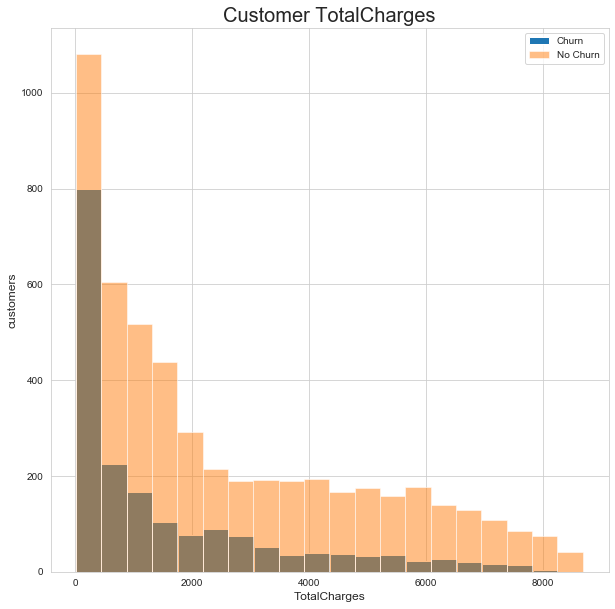

In [46]:
fig,ax = plt.subplots(figsize=(10,10))
telecom.TotalCharges[telecom.Churn == "Yes"].hist(bins = 20)
telecom.TotalCharges[telecom.Churn == "No"].hist(bins = 20 , alpha= 0.5)
plt.legend(["Churn",'No Churn'])
plt.title("Customer TotalCharges",fontsize=20)
plt.xlabel("TotalCharges",fontsize=12)
plt.ylabel("customers",fontsize=12)

In [47]:
telecom.groupby("Churn").size()

Churn
No     5163
Yes    1869
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

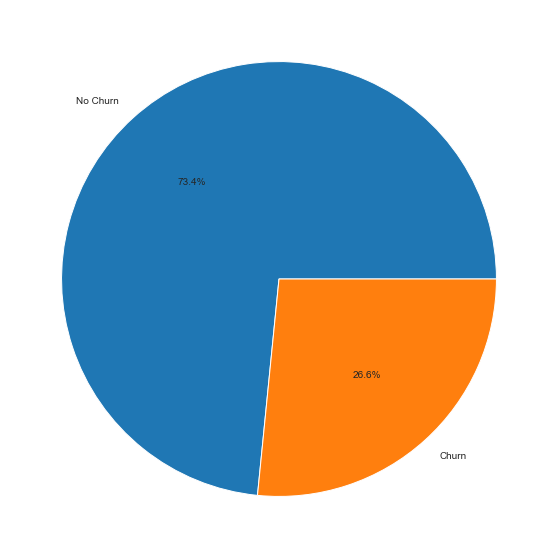

In [48]:
fig,ax = plt.subplots(figsize=(10,10))
labels = 'No Churn','Churn'
u = telecom.groupby("Churn").size().values
ax.pie(u,autopct = "%1.1f%%",labels=labels)
plt.show

## Correlation
#### Correlation will indicate which variables are related to one another and to the target

#### Encode the catagorical varibales in order to make comparison e.g. Yes/No to 1/0

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_years'],
      dtype='object')

In [51]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [52]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure_years']

In [53]:
target_col

['Churn']

In [54]:
encodded_var = pd.DataFrame()

In [55]:
for item in cat_cols:
    encodded_var[item] = le.fit_transform(telecom[item].values) 

In [56]:
encodded_var.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             1                 0   
1                0               1             0                 1   
2                0               1             1                 0   
3                0               1             0                 1   
4                1               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            1            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  
0              2  
1              3  
2              3  
3              0  
4              2

In [57]:
encodded_var['PaymentMethod'].unique()

array([2, 3, 0, 1])

In [58]:
for item in num_cols:
    encodded_var[item] = telecom[item]

In [59]:
encodded_var.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             1                 0   
1                0               1             0                 1   
2                0               1             1                 0   
3                0               1             0                 1   
4                1               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            1            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  tenure  MonthlyCharges  TotalCharges  tenure_years  
0              2       1           29.85         29.85             1  
1              3      34           56.95       1889.50             3  
2              3       2           53.85        108.15             1  
3              0      45           42.30       1840.75             4  
4              2       2           70.70        151.65             1

In [60]:
for item in target_col:
    encodded_var[item] = le.fit_transform(telecom[item].values) 

In [61]:
def heatmap(data):
    corr = data.corr()
    fig,ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr,cmap="Blues",annot=True,fmt=".2f",linewidths=.2)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show

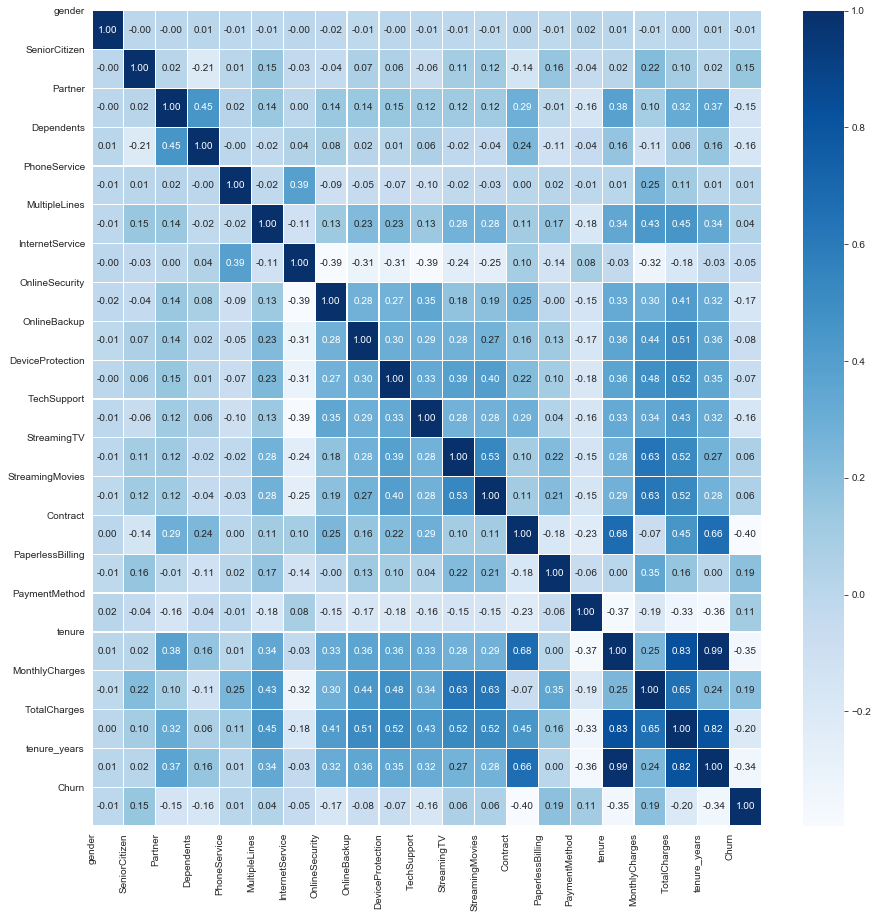

In [62]:
heatmap(encodded_var)

In [63]:
encodded_var.columns[0:]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'tenure_years', 'Churn'],
      dtype='object')

In [64]:
corr_encodded = encodded_var[encodded_var.columns[0:]].corr()["Churn"][:]

In [65]:
np.abs(corr_encodded).sort_values(ascending=False)[1:6]

Contract          0.396150
tenure            0.354049
tenure_years      0.340311
TotalCharges      0.199484
MonthlyCharges    0.192858
Name: Churn, dtype: float64

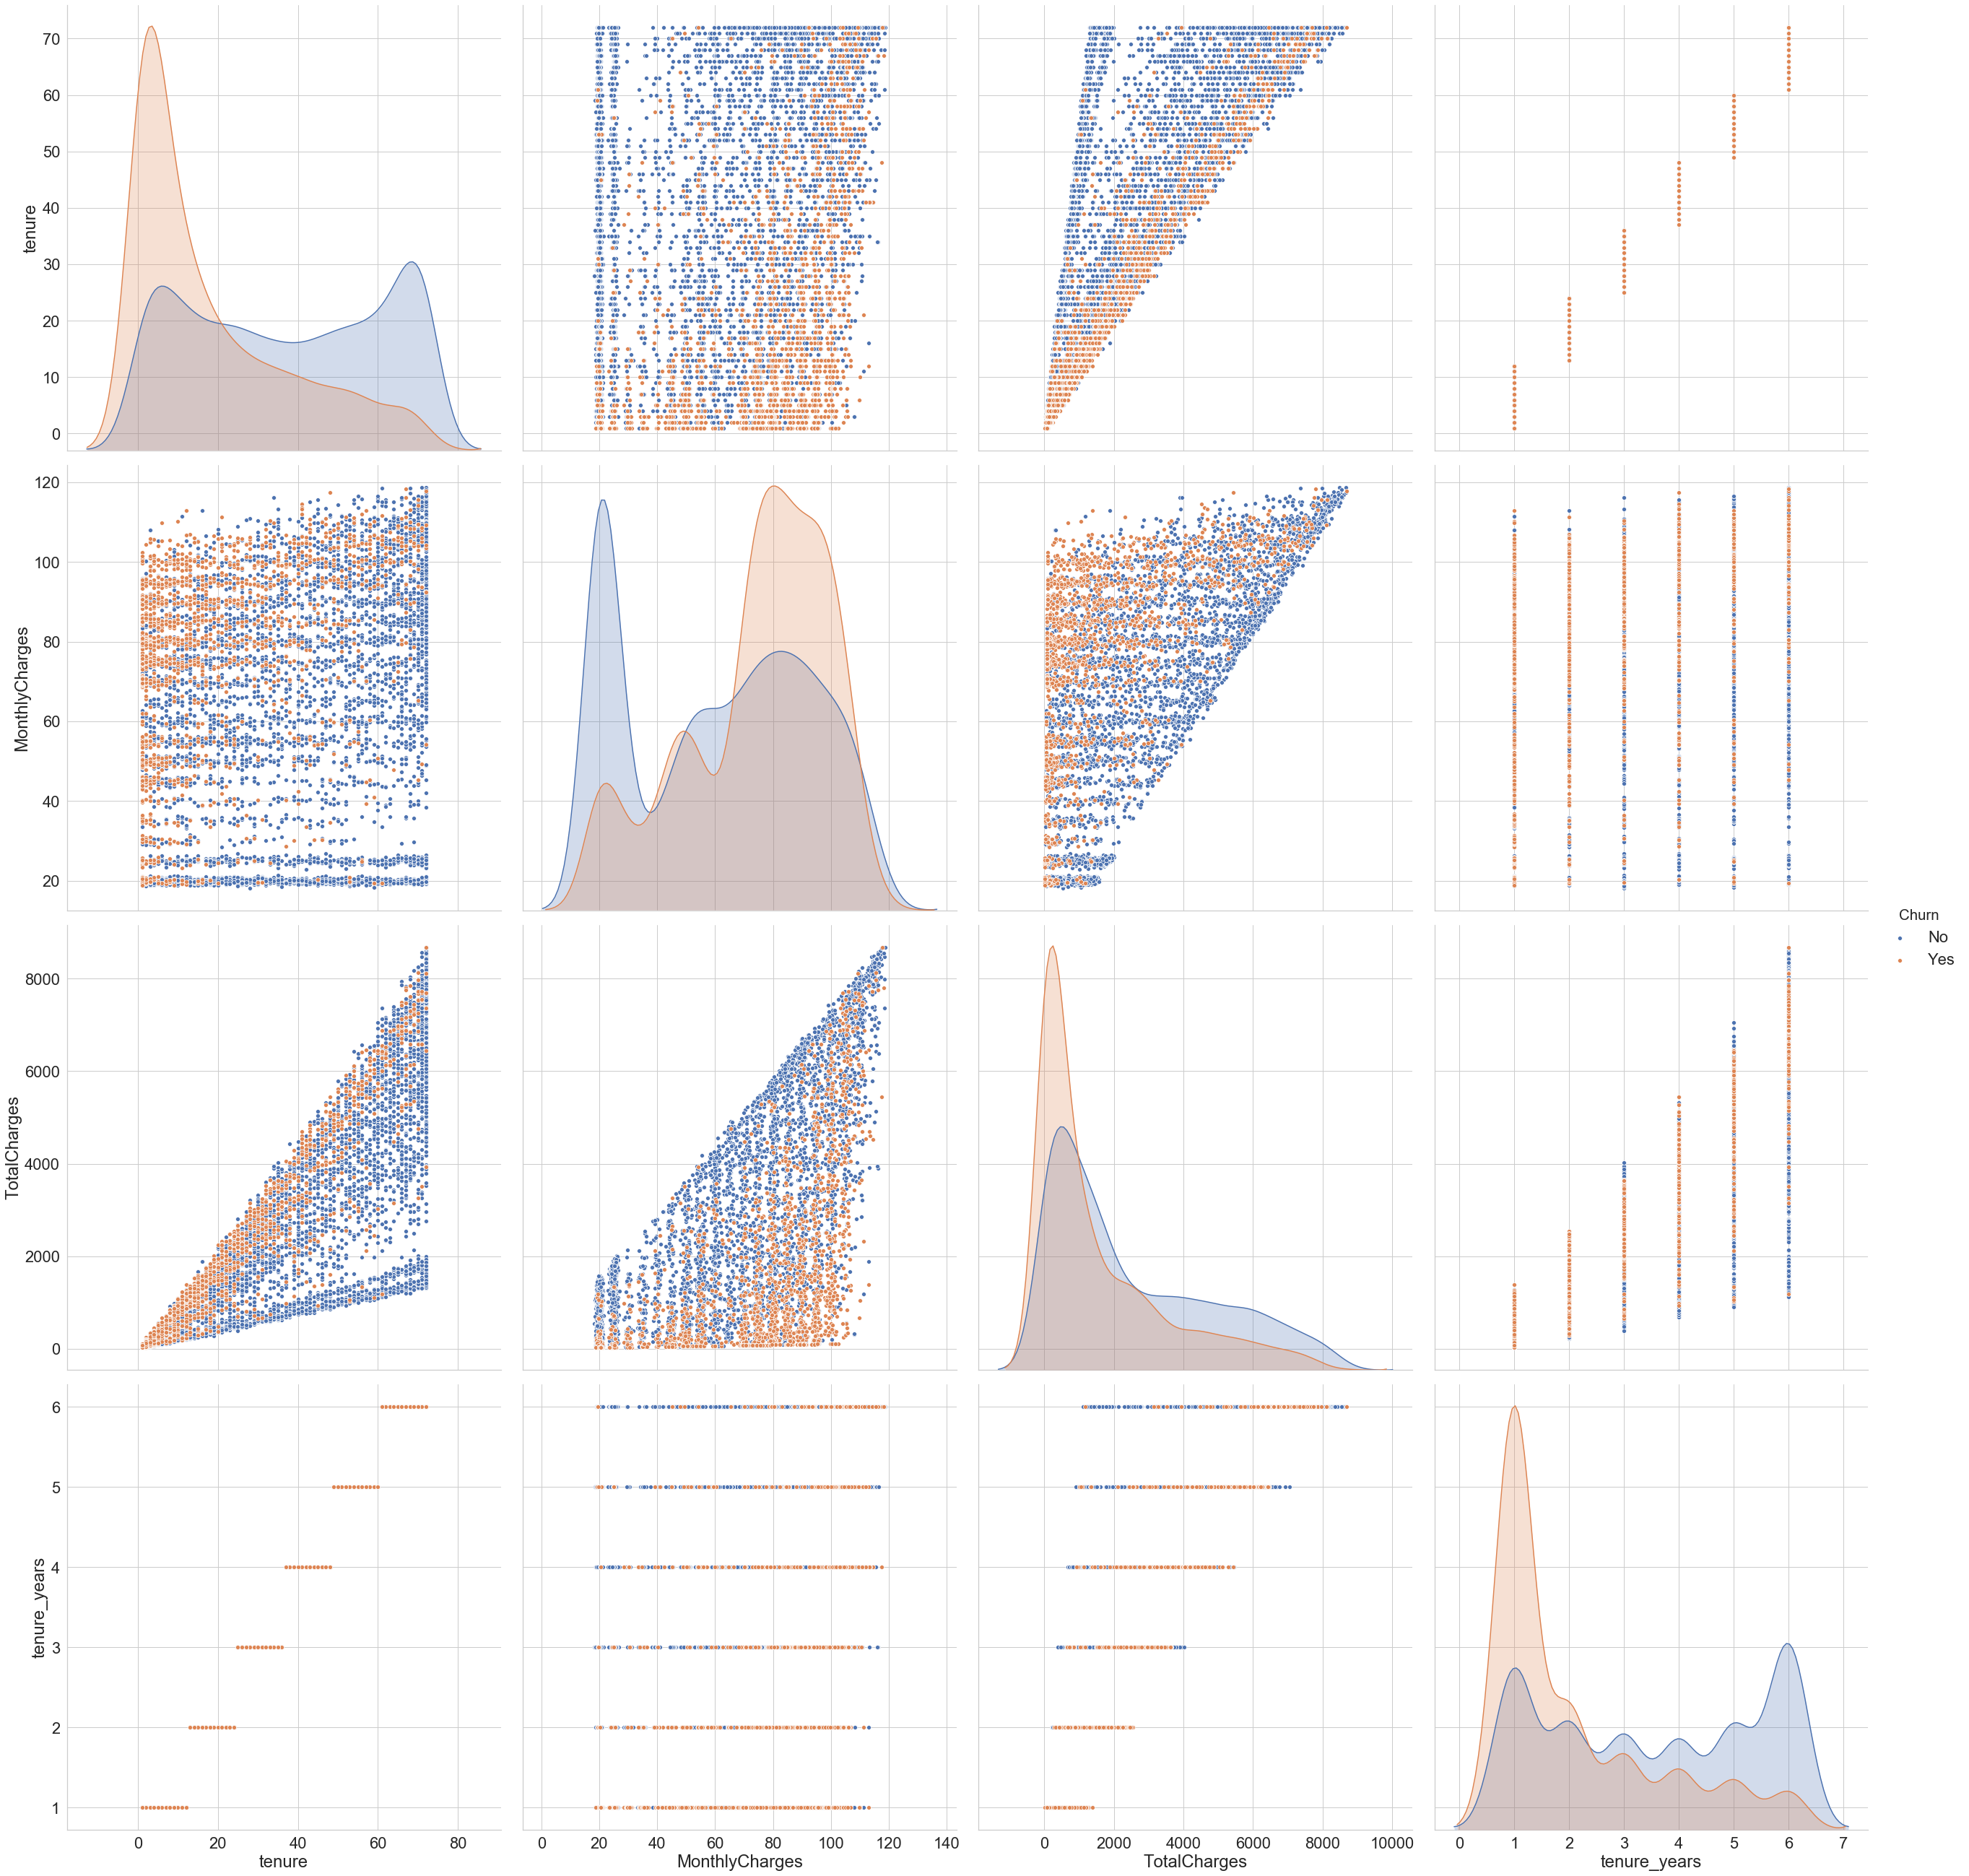

In [66]:
sns.set(font_scale=2)
sns.set_style(style='whitegrid')
sns.pairplot(telecom, hue="Churn", height=9)

In [67]:
encodded_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int32  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   PhoneService      7032 non-null   int32  
 5   MultipleLines     7032 non-null   int32  
 6   InternetService   7032 non-null   int32  
 7   OnlineSecurity    7032 non-null   int32  
 8   OnlineBackup      7032 non-null   int32  
 9   DeviceProtection  7032 non-null   int32  
 10  TechSupport       7032 non-null   int32  
 11  StreamingTV       7032 non-null   int32  
 12  StreamingMovies   7032 non-null   int32  
 13  Contract          7032 non-null   int32  
 14  PaperlessBilling  7032 non-null   int32  
 15  PaymentMethod     7032 non-null   int32  
 16  tenure            7032 non-null   int64  


In [68]:
features = encodded_var.drop(columns=['Churn', 'tenure_years', 'gender','SeniorCitizen','PhoneService']).columns

In [69]:
features

Index(['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [70]:
target=["Churn"]

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [72]:
down = encodded_var[encodded_var.Churn == 1]
up = encodded_var[encodded_var.Churn == 0]
down = down.Churn.count()
up = up.Churn.count()
print(f'Churn Fraction: {down/(up+down)}')

Churn Fraction: 0.26578498293515357


In [73]:
#let's first separate majority class and minority class and resample

telecom_majority = encodded_var[encodded_var.Churn == 0]
telecom_minority = encodded_var[encodded_var.Churn == 1]

# Downsample majority class
telecom_majority_downsampled = resample(telecom_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
telecom_downsampled = pd.concat([telecom_majority_downsampled, telecom_minority])

telecom_downsampled.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
y = telecom_downsampled[target]
X = telecom_downsampled[features]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

In [80]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve\
,precision_score, recall_score, precision_recall_curve, classification_report, roc_auc_score

In [81]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=42, max_iter=1000)
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_logr))
print(f'Accuracy: {accuracy_score(y_test, y_pred_logr)}')
print(f'Precision: {precision_score(y_test, y_pred_logr)}')
print(f'Recall: {recall_score(y_test, y_pred_logr)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred_logr)}')

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       187
           1       0.73      0.78      0.75       187

    accuracy                           0.74       374
   macro avg       0.74      0.74      0.74       374
weighted avg       0.74      0.74      0.74       374

Accuracy: 0.7433155080213903
Precision: 0.7263681592039801
Recall: 0.7807486631016043
Confusion Matrix: [[132  55]
 [ 41 146]]


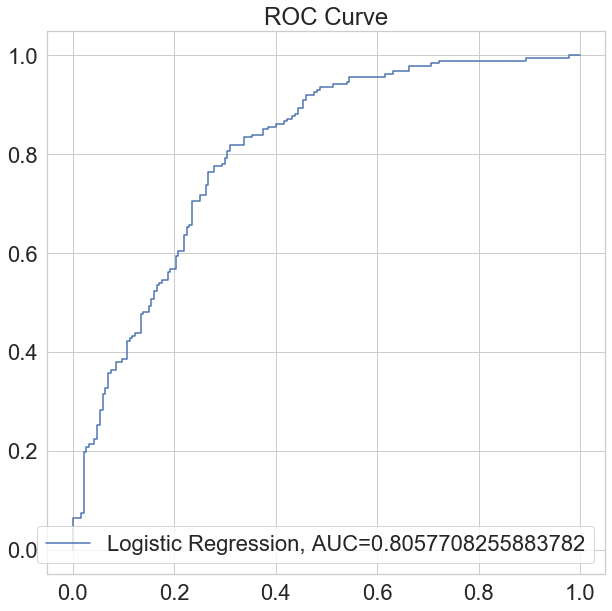

In [83]:
fig, ax = plt.subplots(figsize = (10,10))
y_prob = logr.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label=f"Logistic Regression, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

### Light GBM - Feature importance

In [87]:
import lightgbm as lgb

In [88]:
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75) 

In [89]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       187
           1       0.71      0.76      0.74       187

    accuracy                           0.73       374
   macro avg       0.73      0.73      0.73       374
weighted avg       0.73      0.73      0.73       374



In [91]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7272727272727273
Precision: 0.7135678391959799
Recall: 0.7593582887700535
Confusion Matrix: [[130  57]
 [ 45 142]]


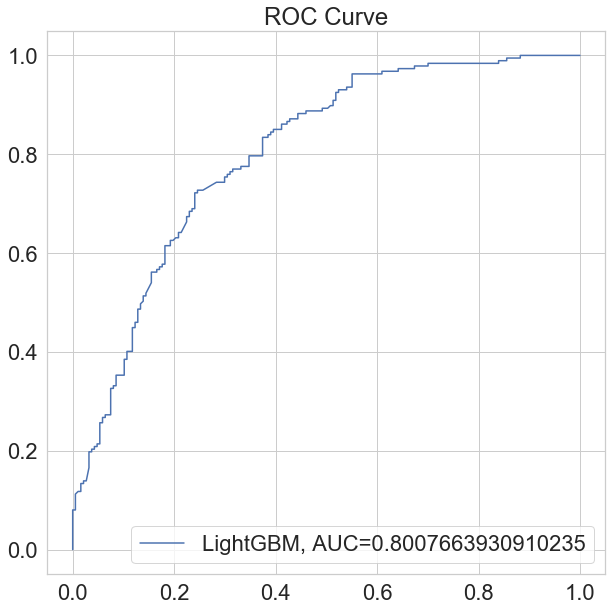

In [92]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style(style='whitegrid')
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

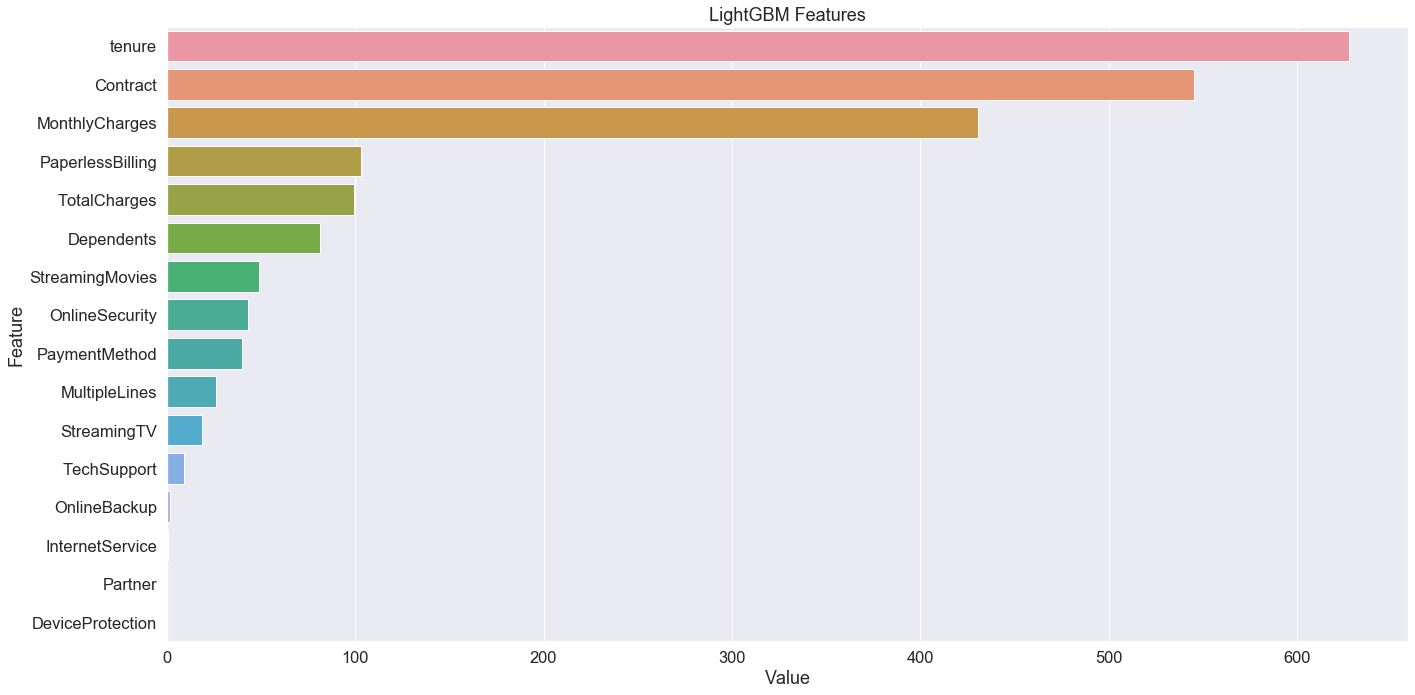

In [94]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

### Feature Engineering
from correlation we can see the important features 
Contract
MonthlyCharges
PaperlessBilling
TotalCharges
Dependents
StreamingMovies

In [95]:
feature_imp.sort_values(by="Value", ascending=False).head(6)

Value           Feature
15  627.656144            tenure
14  545.102970          Contract
13  430.470926    MonthlyCharges
12  103.088162  PaperlessBilling
11   99.496793      TotalCharges
10   81.200990        Dependents

In [96]:
## Total Services 

In [97]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [98]:
encodded_var["services"] = encodded_var[services].apply(lambda x: x.sum() , axis=1)

In [99]:
encodded_var["services"].head()

0    3
1    3
2    4
3    4
4    3
Name: services, dtype: int64

In [108]:
features = encodded_var.drop(columns=['Churn','gender','SeniorCitizen','PhoneService']).columns

In [120]:
features

Index(['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'tenure_years', 'services'],
      dtype='object')

In [109]:
target

['Churn']

In [111]:
te_majority = encodded_var[encodded_var.Churn == 0]
te_minority = encodded_var[encodded_var.Churn == 1]

In [113]:
te_majority_downsampled = resample(te_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
te_downsampled = pd.concat([te_majority_downsampled, te_minority])

te_downsampled.Churn.value_counts()
y = te_downsampled[target]
X = te_downsampled[features]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

In [118]:
## lightGBM
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75) 

In [119]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       187
           1       0.71      0.75      0.73       187

    accuracy                           0.72       374
   macro avg       0.72      0.72      0.72       374
weighted avg       0.72      0.72      0.72       374

Accuracy: 0.7219251336898396
Precision: 0.7106598984771574
Recall: 0.7486631016042781
Confusion Matrix: [[130  57]
 [ 47 140]]


In [140]:
features = encodded_var.drop(columns=['Churn','tenure_years','gender',
                                    'SeniorCitizen','PhoneService']).columns
target = ['Churn']
te_majority = encodded_var[encodded_var.Churn == 0]
te_minority = encodded_var[encodded_var.Churn == 1]


# Downsample majority class
te_majority_downsampled = resample(te_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
te_downsampled = pd.concat([te_majority_downsampled, te_minority])

te_downsampled.Churn.value_counts()
y = te_downsampled[target]
X = te_downsampled[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)


In [141]:
import lightgbm as lgb

In [142]:
#LightGBM

clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       187
           1       0.71      0.76      0.74       187

    accuracy                           0.72       374
   macro avg       0.73      0.72      0.72       374
weighted avg       0.73      0.72      0.72       374

Accuracy: 0.7245989304812834
Precision: 0.7079207920792079
Recall: 0.7647058823529411
Confusion Matrix: [[128  59]
 [ 44 143]]


In [137]:
### check features importance

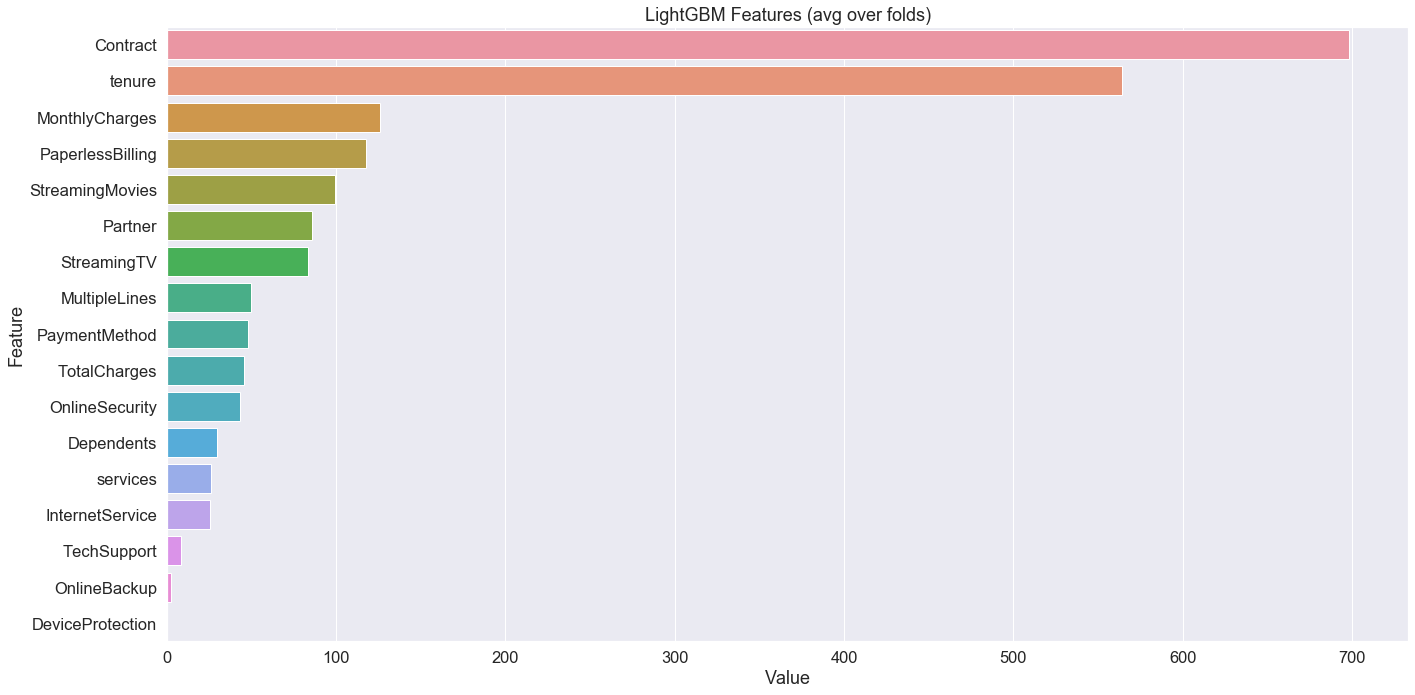

In [138]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

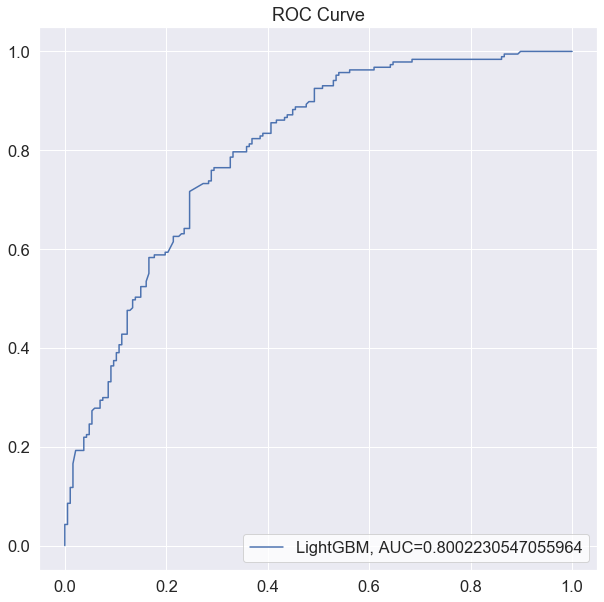

In [139]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style(style='whitegrid')
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

In [ ]:
### calculate extra charges per month

In [149]:
encodded_var["ExtraCharges"] = ((encodded_var.MonthlyCharges * encodded_var.tenure) - encodded_var.TotalCharges)

In [150]:
encodded_var["ExtraCharges"].head()

0     0.00
1    46.80
2    -0.45
3    62.75
4   -10.25
Name: ExtraCharges, dtype: float64

In [ ]:
### calculate average charges/services

In [151]:
encodded_var["avgCharges"] = (encodded_var.MonthlyCharges / encodded_var.services)

In [154]:
features = encodded_var.drop(columns=['Churn','tenure_years','gender',
                                    'SeniorCitizen','PhoneService']).columns
target = ['Churn']
te_majority = encodded_var[encodded_var.Churn == 0]
te_minority = encodded_var[encodded_var.Churn == 1]


# Downsample majority class
te_majority_downsampled = resample(te_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
te_downsampled = pd.concat([te_majority_downsampled, te_minority])

te_downsampled.Churn.value_counts()
y = te_downsampled[target]
X = te_downsampled[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, stratify=y)

#LightGBM
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=800, max_bin=500,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.4, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       187
           1       0.73      0.74      0.74       187

    accuracy                           0.74       374
   macro avg       0.74      0.74      0.74       374
weighted avg       0.74      0.74      0.74       374

Accuracy: 0.7352941176470589
Precision: 0.7315789473684211
Recall: 0.7433155080213903
Confusion Matrix: [[136  51]
 [ 48 139]]


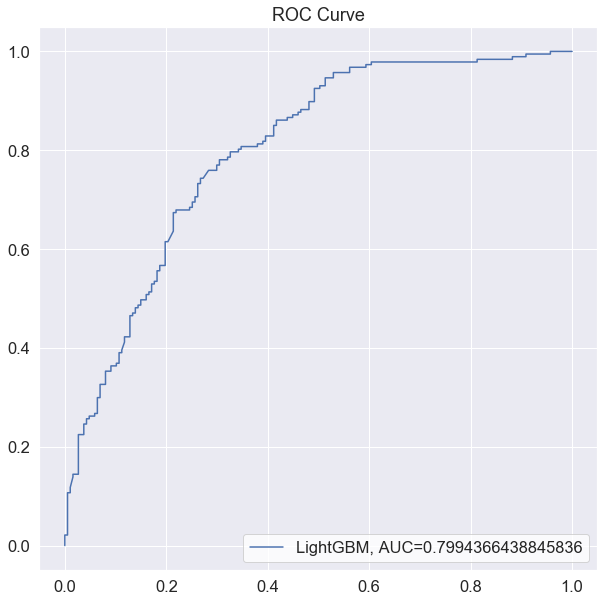

In [158]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style(style='whitegrid')
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

In [155]:
## Check importance

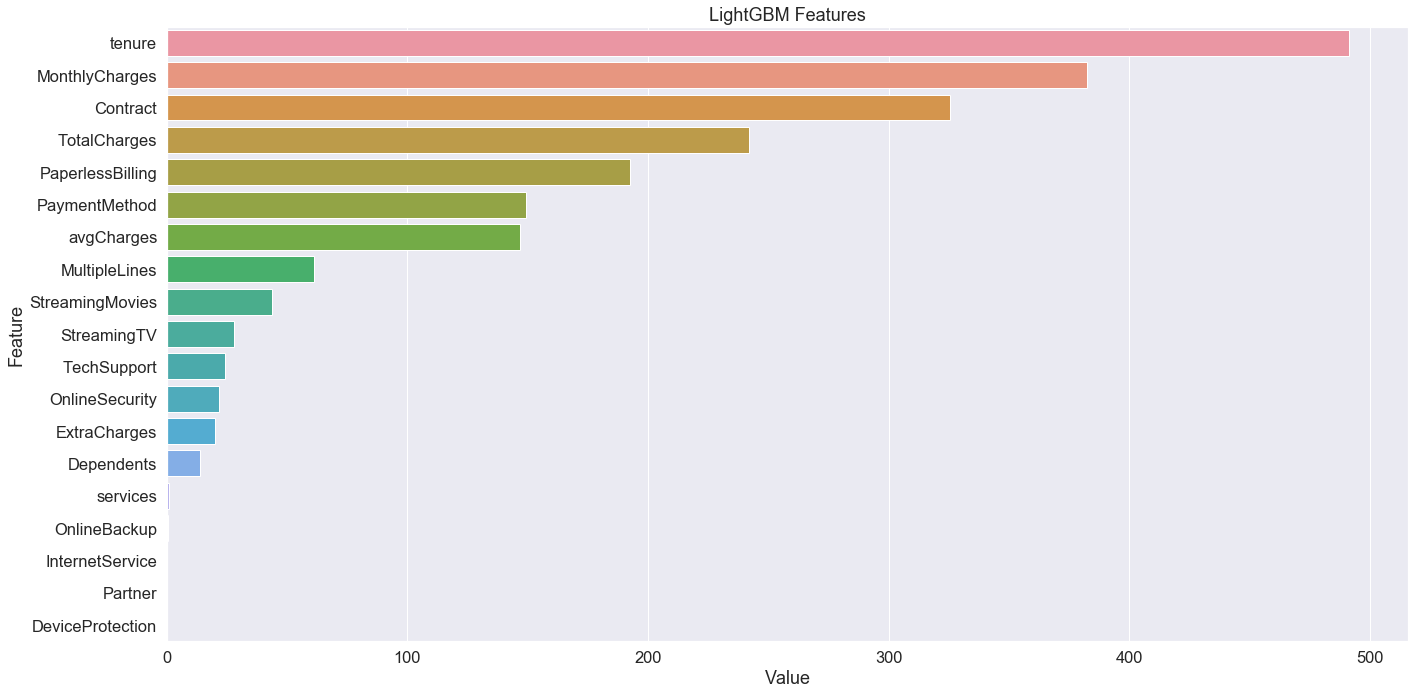

In [157]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [160]:
features

Index(['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges', 'services',
       'ExtraCharges', 'avgCharges'],
      dtype='object')

In [167]:
encodded_var.head(10)

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   
5       0              0        0           0             1              2   
6       1              0        0           1             1              2   
7       0              0        0           0             0              1   
8       0              0        1           0             1              2   
9       1              0        0           1             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                0               0             1                 0  ...   
1                0               1             0                 1  ...   
2                0               1             1                 0  ...   
3                0               1             0                 1  ...   
4                1               0             0                 0  ...   
5                1               0             0                 1  ...   
6                1               0             1                 0  ...   
7                0               1             0                 0  ...   
8                1               0             0                 1  ...   
9                0               1             1                 0  ...   

   PaperlessBilling  PaymentMethod  tenure  MonthlyCharges  TotalCharges  \
0                 1              2       1           29.85         29.85   
1                 0              3      34           56.95       1889.50   
2                 1              3       2           53.85        108.15   
3                 0              0      45           42.30       1840.75   
4                 1              2       2           70.70        151.65   
5                 1              2       8           99.65        820.50   
6                 1              1      22           89.10       1949.40   
7                 0              3      10           29.75        301.90   
8                 1              2      28          104.80       3046.05   
9                 0              0      62           56.15       3487.95   

   tenure_years  Churn  services  ExtraCharges  avgCharges  
0             1      0         3          0.00    9.950000  
1             3      0         3         46.80   18.983333  
2             1      1         4         -0.45   13.462500  
3             4      0         4         62.75   10.575000  
4             1      1         3        -10.25   23.566667  
5             1      1         8        -23.30   12.456250  
6             2      0         7         10.80   12.728571  
7             1      0         2         -4.40   14.875000  
8             3      1         9       -111.65   11.644444  
9             6      0         3         -6.65   18.716667  

[10 rows x 24 columns]

In [ ]:
# change MonthlyCharges to categorical column
def monthlycharges_split(df) :   
    if encodded_var['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (encodded_var['MonthlyCharges'] > 30) & (encodded_var['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (encodded_var['MonthlyCharges'] > 70) & (encodded_var['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif encodded_var['MonthlyCharges'] > 99 :
        return '99plus'
encodded_var['monthlycharges_group'] = encodded_var.apply(lambda encodded_var:monthlycharges_split(encodded_var), axis = 1)

# change TotalCharges to categorical column
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif (df['TotalCharges'] > 2000) & (df['TotalCharges'] <= 4000 ):
        return '2k-4k'
    elif (df['TotalCharges'] > 4000) & (df['TotalCharges'] <= 6000) :
        return '4k-6k'
    elif df['TotalCharges'] > 6000 :
        return '6kplus'
df['totalcharges_group'] = df.apply(lambda df:totalcharges_split(df), axis = 1)

# change Tenure to categorical column
def tenure_split(df) :   
    if df['tenure'] <= 20 :
        return '0-20'
    elif (df['tenure'] > 20) & (df['tenure'] <= 40 ):
        return '20-40'
    elif (df['tenure'] > 40) & (df['tenure'] <= 60) :
        return '40-60'
    elif df['tenure'] > 60 :
        return '60plus'
df['tenure_group'] = df.apply(lambda df:tenure_split(df), axis = 1)


In [168]:
# change MonthlyCharges to categorical column
def monthlycharges_split(encodded_var) :   
    if encodded_var['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (encodded_var['MonthlyCharges'] > 30) & (encodded_var['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (encodded_var['MonthlyCharges'] > 70) & (encodded_var['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif encodded_var['MonthlyCharges'] > 99 :
        return '99plus'
encodded_var['monthlycharges_group'] = encodded_var.apply(lambda encodded_var:monthlycharges_split(encodded_var), axis = 1)

In [170]:
# change TotalCharges to categorical column
def totalcharges_split(encodded_var) :   
    if encodded_var['TotalCharges'] <= 2000 :
        return '0-2k'
    elif (encodded_var['TotalCharges'] > 2000) & (encodded_var['TotalCharges'] <= 4000 ):
        return '2k-4k'
    elif (encodded_var['TotalCharges'] > 4000) & (encodded_var['TotalCharges'] <= 6000) :
        return '4k-6k'
    elif encodded_var['TotalCharges'] > 6000 :
        return '6kplus'
encodded_var['totalcharges_group'] = encodded_var.apply(lambda encodded_var:totalcharges_split(encodded_var), axis = 1)

# change Tenure to categorical column
def tenure_split(encodded_var) :   
    if encodded_var['tenure'] <= 20 :
        return '0-20'
    elif (encodded_var['tenure'] > 20) & (encodded_var['tenure'] <= 40 ):
        return '20-40'
    elif (encodded_var['tenure'] > 40) & (encodded_var['tenure'] <= 60) :
        return '40-60'
    elif encodded_var['tenure'] > 60 :
        return '60plus'
encodded_var['tenure_group'] = encodded_var.apply(lambda encodded_var:tenure_split(encodded_var), axis = 1)


In [172]:
encodded_var.head(10)

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   
5       0              0        0           0             1              2   
6       1              0        0           1             1              2   
7       0              0        0           0             0              1   
8       0              0        1           0             1              2   
9       1              0        0           1             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                0               0             1                 0  ...   
1                0               1             0                 1  ...   
2                0               1             1                 0  ...   
3                0               1             0                 1  ...   
4                1               0             0                 0  ...   
5                1               0             0                 1  ...   
6                1               0             1                 0  ...   
7                0               1             0                 0  ...   
8                1               0             0                 1  ...   
9                0               1             1                 0  ...   

   MonthlyCharges  TotalCharges  tenure_years  Churn  services  ExtraCharges  \
0           29.85         29.85             1      0         3          0.00   
1           56.95       1889.50             3      0         3         46.80   
2           53.85        108.15             1      1         4         -0.45   
3           42.30       1840.75             4      0         4         62.75   
4           70.70        151.65             1      1         3        -10.25   
5           99.65        820.50             1      1         8        -23.30   
6           89.10       1949.40             2      0         7         10.80   
7           29.75        301.90             1      0         2         -4.40   
8          104.80       3046.05             3      1         9       -111.65   
9           56.15       3487.95             6      0         3         -6.65   

   avgCharges  monthlycharges_group  totalcharges_group  tenure_group  
0    9.950000                  0-30                0-2k          0-20  
1   18.983333                 30-70                0-2k         20-40  
2   13.462500                 30-70                0-2k          0-20  
3   10.575000                 30-70                0-2k         40-60  
4   23.566667                 70-99                0-2k          0-20  
5   12.456250                99plus                0-2k          0-20  
6   12.728571                 70-99                0-2k         20-40  
7   14.875000                  0-30                0-2k          0-20  
8   11.644444                99plus               2k-4k         20-40  
9   18.716667                 30-70               2k-4k        60plus  

[10 rows x 27 columns]

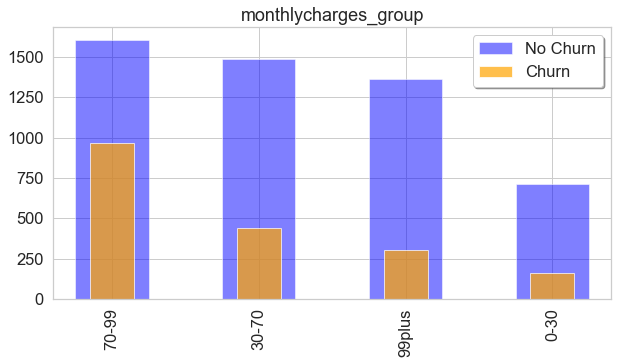

In [176]:
# new features monthlycharges_group
plt.figure(figsize = [10,5])
encodded_var[encodded_var.Churn == 0]['monthlycharges_group'].value_counts().plot(kind ='bar', color="blue", alpha=0.5).set_title('monthlycharges_group')
encodded_var[encodded_var.Churn == 1]['monthlycharges_group'].value_counts().plot(kind ='bar', color="orange", alpha=0.7, width=0.3)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

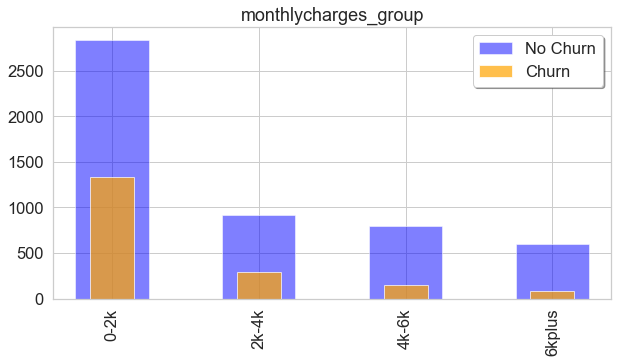

In [177]:
# new features totalcharges_group
plt.figure(figsize = [10,5])
encodded_var[encodded_var.Churn == 0]['totalcharges_group'].value_counts().plot(kind ='bar', color="blue", alpha=0.5).set_title('monthlycharges_group')
encodded_var[encodded_var.Churn == 1]['totalcharges_group'].value_counts().plot(kind ='bar', color="orange", alpha=0.7, width=0.3)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

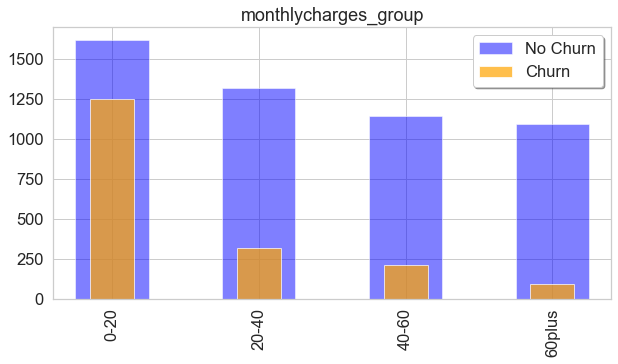

In [178]:
# new features tenure_group
plt.figure(figsize = [10,5])
encodded_var[encodded_var.Churn == 0]['tenure_group'].value_counts().plot(kind ='bar', color="blue", alpha=0.5).set_title('monthlycharges_group')
encodded_var[encodded_var.Churn == 1]['tenure_group'].value_counts().plot(kind ='bar', color="orange", alpha=0.7, width=0.3)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

In [179]:
encodded_var.to_csv("df.csv",index=False)

In [180]:
df = pd.read_csv("df.csv")

In [181]:
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

In [182]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'monthlycharges_group',
 'totalcharges_group',
 'tenure_group']

In [183]:
df.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                0               0             1                 0  ...   
1                0               1             0                 1  ...   
2                0               1             1                 0  ...   
3                0               1             0                 1  ...   
4                1               0             0                 0  ...   

   MonthlyCharges  TotalCharges  tenure_years  Churn  services  ExtraCharges  \
0           29.85         29.85             1      0         3          0.00   
1           56.95       1889.50             3      0         3         46.80   
2           53.85        108.15             1      1         4         -0.45   
3           42.30       1840.75             4      0         4         62.75   
4           70.70        151.65             1      1         3        -10.25   

   avgCharges  monthlycharges_group  totalcharges_group  tenure_group  
0    9.950000                  0-30                0-2k          0-20  
1   18.983333                 30-70                0-2k         20-40  
2   13.462500                 30-70                0-2k          0-20  
3   10.575000                 30-70                0-2k         40-60  
4   23.566667                 70-99                0-2k          0-20  

[5 rows x 27 columns]

In [184]:
## our taget
target_col = ['Churn']

In [185]:
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]

In [186]:
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()

In [187]:
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [188]:
telecom.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  tenure_years  
0           Electronic check          29.85        29.85     No             1  
1               Mailed check          56.95      1889.50     No             3  
2               Mailed check          53.85       108.15    Yes             1  
3  Bank transfer (automatic)          42.30      1840.75     No             4  
4           Electronic check          70.70       151.65    Yes             1  

[5 rows x 22 columns]

In [189]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])

In [191]:
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df, columns = multi_cols)

In [192]:
df.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  OnlineSecurity  \
0       0              0        1           0             0               0   
1       1              0        0           0             1               1   
2       1              0        0           0             1               1   
3       1              0        0           0             0               1   
4       0              0        0           0             1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             1                 0            0            0  ...   
1             0                 1            0            0  ...   
2             1                 0            0            0  ...   
3             0                 1            1            0  ...   
4             0                 0            0            0  ...   

   monthlycharges_group_70-99  monthlycharges_group_99plus  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   totalcharges_group_0-2k  totalcharges_group_2k-4k  \
0                        1                         0   
1                        1                         0   
2                        1                         0   
3                        1                         0   
4                        1                         0   

   totalcharges_group_4k-6k  totalcharges_group_6kplus  tenure_group_0-20  \
0                         0                          0                  1   
1                         0                          0                  0   
2                         0                          0                  1   
3                         0                          0                  0   
4                         0                          0                  1   

   tenure_group_20-40  tenure_group_40-60  tenure_group_60plus  
0                   0                   0                    0  
1                   1                   0                    0  
2                   0                   0                    0  
3                   0                   1                    0  
4                   0                   0                    0  

[5 rows x 45 columns]

In [194]:
df.describe()

gender  SeniorCitizen      Partner   Dependents  PhoneService  \
count  7032.000000    7032.000000  7032.000000  7032.000000   7032.000000   
mean      0.504693       0.162400     0.482509     0.298493      0.903299   
std       0.500014       0.368844     0.499729     0.457629      0.295571   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     0.000000      1.000000   
50%       1.000000       0.000000     0.000000     0.000000      1.000000   
75%       1.000000       0.000000     1.000000     1.000000      1.000000   
max       1.000000       1.000000     1.000000     1.000000      1.000000   

       OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
count     7032.000000   7032.000000       7032.000000  7032.000000   
mean         0.286547      0.344852          0.343857     0.290102   
std          0.452180      0.475354          0.475028     0.453842   
min          0.000000      0.000000          0.000000     0.000000   
25%          0.000000      0.000000          0.000000     0.000000   
50%          0.000000      0.000000          0.000000     0.000000   
75%          1.000000      1.000000          1.000000     1.000000   
max          1.000000      1.000000          1.000000     1.000000   

       StreamingTV  ...  monthlycharges_group_70-99  \
count  7032.000000  ...                 7032.000000   
mean      0.384386  ...                    0.365188   
std       0.486484  ...                    0.481517   
min       0.000000  ...                    0.000000   
25%       0.000000  ...                    0.000000   
50%       0.000000  ...                    0.000000   
75%       1.000000  ...                    1.000000   
max       1.000000  ...                    1.000000   

       monthlycharges_group_99plus  totalcharges_group_0-2k  \
count                  7032.000000              7032.000000   
mean                      0.144056                 0.593857   
std                       0.351171                 0.491147   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 1.000000   
75%                       0.000000                 1.000000   
max                       1.000000                 1.000000   

       totalcharges_group_2k-4k  totalcharges_group_4k-6k  \
count               7032.000000                7032.00000   
mean                   0.171786                   0.13595   
std                    0.377221                   0.34276   
min                    0.000000                   0.00000   
25%                    0.000000                   0.00000   
50%                    0.000000                   0.00000   
75%                    0.000000                   0.00000   
max                    1.000000                   1.00000   

       totalcharges_group_6kplus  tenure_group_0-20  tenure_group_20-40  \
count                7032.000000        7032.000000         7032.000000   
mean                    0.098407           0.407708            0.200228   
std                     0.297886           0.491443            0.400199   
min                     0.000000           0.000000            0.000000   
25%                     0.000000           0.000000            0.000000   
50%                     0.000000           0.000000            0.000000   
75%                     0.000000           1.000000            0.000000   
max                     1.000000           1.000000            1.000000   

       tenure_group_40-60  tenure_group_60plus  
count         7032.000000          7032.000000  
mean             0.191980             0.200085  
std              0.393885             0.400092  
min              0.000000             0.000000  
25%              0.000000             0.000000  
50%              0.000000             0.000000  
75%              0.000000             0.000000  
max  

In [199]:
df.ExtraCharges

0         0.00
1        46.80
2        -0.45
3        62.75
4       -10.25
         ...  
7027     44.70
7028     67.50
7029    -20.85
7030     -9.00
7031    128.40
Name: ExtraCharges, Length: 7032, dtype: float64

In [204]:
telecom

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7027  6840-RESVB    Male            No     Yes        Yes      24   
7028  2234-XADUH  Female            No     Yes        Yes      72   
7029  4801-JZAZL  Female            No     Yes        Yes      11   
7030  8361-LTMKD    Male           Yes     Yes         No       4   
7031  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7027         Yes         Yes             Yes        One year              Yes   
7028          No         Yes             Yes        One year              Yes   
7029          No          No              No  Month-to-month              Yes   
7030          No          No              No  Month-to-month              Yes   
7031         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7027               Mailed check          84.80      1990.50     No   
7028    Credit card (automatic)         103.20      7362.90     No   
7029           Electronic check          29.60       346.45     No   
7030               Mailed check          74.40       306.60    Yes   
7031  Bank transfer (automatic)         105.65      6844.50     No   

      tenure_years  
0                1  
1                3  
2                1  
3                4  
4                1  
...            ...  
7027             2  
7028             6  
7029             1  
7030             1  
7031             6  

[7032 rows x 22 columns]

In [217]:
del(df,df1)

In [222]:
def Tenure_years(telecom):
    if   telecom['tenure'] <= 12:
        return 1
    elif (telecom['tenure'] > 12) & (telecom['tenure'] <= 24):
        return 2
    elif (telecom['tenure'] > 24) & (telecom['tenure'] <= 36):
        return 3
    elif (telecom['tenure'] > 36) & (telecom['tenure'] <= 48):
        return 4
    elif (telecom['tenure'] > 48) & (telecom['tenure'] <= 60):
        return 5
    else:
        return 6


In [223]:
df = telecom

In [226]:
df["tenure_years"] = df.apply(lambda df:Tenure_years(df),axis = 1)

In [227]:
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...        Contract  \
0  No phone service             DSL             No  ...  Month-to-month   
1                No             DSL            Yes  ...        One year   
2                No             DSL            Yes  ...  Month-to-month   
3  No phone service             DSL            Yes  ...        One year   
4                No     Fiber optic             No  ...  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check          29.85        29.85   
1               No               Mailed check          56.95      1889.50   
2              Yes               Mailed check          53.85       108.15   
3               No  Bank transfer (automatic)          42.30      1840.75   
4              Yes           Electronic check          70.70       151.65   

  Churn tenure_years monthlycharges_group  totalcharges_group  tenure_group  
0    No            1                 0-30                0-2k          0-20  
1    No            3                30-70                0-2k         20-40  
2   Yes            1                30-70                0-2k          0-20  
3    No            4                30-70                0-2k         40-60  
4   Yes            1                70-99                0-2k          0-20  

[5 rows x 25 columns]

In [228]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [237]:
df["services"] = encodded_var["services"]

In [230]:
df["ExtraCharges"] = ((df.MonthlyCharges * df.tenure) - df.TotalCharges)

In [238]:
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... MonthlyCharges  \
0  No phone service             DSL             No  ...          29.85   
1                No             DSL            Yes  ...          56.95   
2                No             DSL            Yes  ...          53.85   
3  No phone service             DSL            Yes  ...          42.30   
4                No     Fiber optic             No  ...          70.70   

  TotalCharges Churn tenure_years monthlycharges_group totalcharges_group  \
0        29.85    No            1                 0-30               0-2k   
1      1889.50    No            3                30-70               0-2k   
2       108.15   Yes            1                30-70               0-2k   
3      1840.75    No            4                30-70               0-2k   
4       151.65   Yes            1                70-99               0-2k   

  tenure_group services  ExtraCharges  avgCharges  
0         0-20        3          0.00    9.950000  
1        20-40        3         46.80   18.983333  
2         0-20        4         -0.45   13.462500  
3        40-60        4         62.75   10.575000  
4         0-20        3        -10.25   23.566667  

[5 rows x 28 columns]

In [240]:
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... MonthlyCharges  \
0  No phone service             DSL             No  ...          29.85   
1                No             DSL            Yes  ...          56.95   
2                No             DSL            Yes  ...          53.85   
3  No phone service             DSL            Yes  ...          42.30   
4                No     Fiber optic             No  ...          70.70   

  TotalCharges Churn tenure_years monthlycharges_group totalcharges_group  \
0        29.85    No            1                 0-30               0-2k   
1      1889.50    No            3                30-70               0-2k   
2       108.15   Yes            1                30-70               0-2k   
3      1840.75    No            4                30-70               0-2k   
4       151.65   Yes            1                70-99               0-2k   

  tenure_group services  ExtraCharges  avgCharges  
0         0-20        3          0.00    9.950000  
1        20-40        3         46.80   18.983333  
2         0-20        4         -0.45   13.462500  
3        40-60        4         62.75   10.575000  
4         0-20        3        -10.25   23.566667  

[5 rows x 28 columns]

In [234]:
df["avgCharges"] = (df.MonthlyCharges / encodded_var.services)

In [206]:
# change MonthlyCharges to categorical column
def monthlycharges_split(df) :   
    if df['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
df['monthlycharges_group'] = df.apply(lambda df:monthlycharges_split(df), axis = 1)

# change TotalCharges to categorical column
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif (df['TotalCharges'] > 2000) & (df['TotalCharges'] <= 4000 ):
        return '2k-4k'
    elif (df['TotalCharges'] > 4000) & (df['TotalCharges'] <= 6000) :
        return '4k-6k'
    elif df['TotalCharges'] > 6000 :
        return '6kplus'
df['totalcharges_group'] = df.apply(lambda df:totalcharges_split(df), axis = 1)

# change Tenure to categorical column
def tenure_split(df) :   
    if df['tenure'] <= 20 :
        return '0-20'
    elif (df['tenure'] > 20) & (df['tenure'] <= 40 ):
        return '20-40'
    elif (df['tenure'] > 40) & (df['tenure'] <= 60) :
        return '40-60'
    elif df['tenure'] > 60 :
        return '60plus'
df['tenure_group'] = df.apply(lambda df:tenure_split(df), axis = 1)

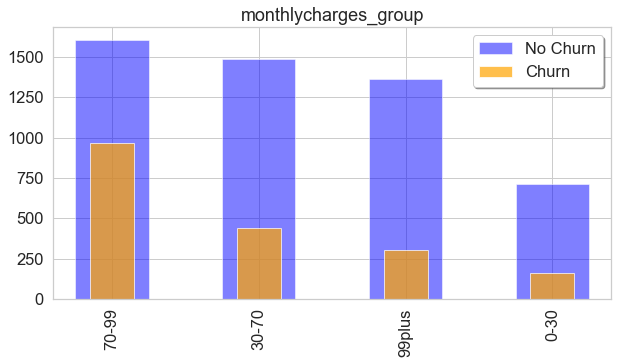

In [207]:
# new features monthlycharges_group
plt.figure(figsize = [10,5])
df[df.Churn == "No"]['monthlycharges_group'].value_counts().plot(kind='bar', color="blue", alpha=0.5).set_title('monthlycharges_group')
df[df.Churn == "Yes"]['monthlycharges_group'].value_counts().plot(kind='bar', color="orange", alpha=0.7, width=0.3)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

## As we experminte above many times, we calculate new features from old ones,there are:
    1- tenure_years
    2- monthlycharges_group
    3- totalcharges_group
    4- tenure_group
    5- services
    6- ExtraCharges
    7- avgCharges
## After labels encoding we will add others.

In [241]:
df.to_csv('df.csv', index=False)

In [242]:
df = pd.read_csv('df.csv')


In [243]:
# Data preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# customer id col
Id_col     = ['customerID']
# Target columns
target_col = ['Churn']
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df, columns = multi_cols)

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df1 = df.drop(columns = num_cols, axis = 1)
df1 = df1.merge(scaled, left_index=True, right_index=True, how = "left")

In [244]:
df1.isnull().any()

customerID                                 False
gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
PhoneService                               False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
Churn                                      False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
Contract_Month-to-mo

In [245]:
df1.head()

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0  7590-VHVEG       0              0        1           0             0   
1  5575-GNVDE       1              0        0           0             1   
2  3668-QPYBK       1              0        0           0             1   
3  7795-CFOCW       1              0        0           0             0   
4  9237-HQITU       0              0        0           0             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0               0             1                 0            0  ...   
1               1             0                 1            0  ...   
2               1             1                 0            0  ...   
3               1             0                 1            1  ...   
4               0             0                 0            0  ...   

   tenure_group_20-40  tenure_group_40-60  tenure_group_60plus    tenure  \
0                   0                   0                    0 -1.280248   
1                   1                   0                    0  0.064303   
2                   0                   0                    0 -1.239504   
3                   0                   1                    0  0.512486   
4                   0                   0                    0 -1.239504   

   MonthlyCharges  TotalCharges  tenure_years  services  ExtraCharges  \
0       -1.161694     -0.994194     -1.128924 -1.017185      0.002278   
1       -0.260878     -0.173740     -0.093703 -1.017185      0.698183   
2       -0.363923     -0.959649     -1.128924 -0.583837     -0.004413   
3       -0.747850     -0.195248      0.423908 -0.583837      0.935356   
4        0.196178     -0.940457     -1.128924 -1.017185     -0.150137   

   avgCharges  
0   -0.459138  
1    0.932980  
2    0.082170  
3   -0.362820  
4    1.639313  

[5 rows x 46 columns]

In [248]:
df1.dtypes

customerID                                  object
gender                                       int32
SeniorCitizen                                int32
Partner                                      int32
Dependents                                   int32
PhoneService                                 int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
Churn                                        int32
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

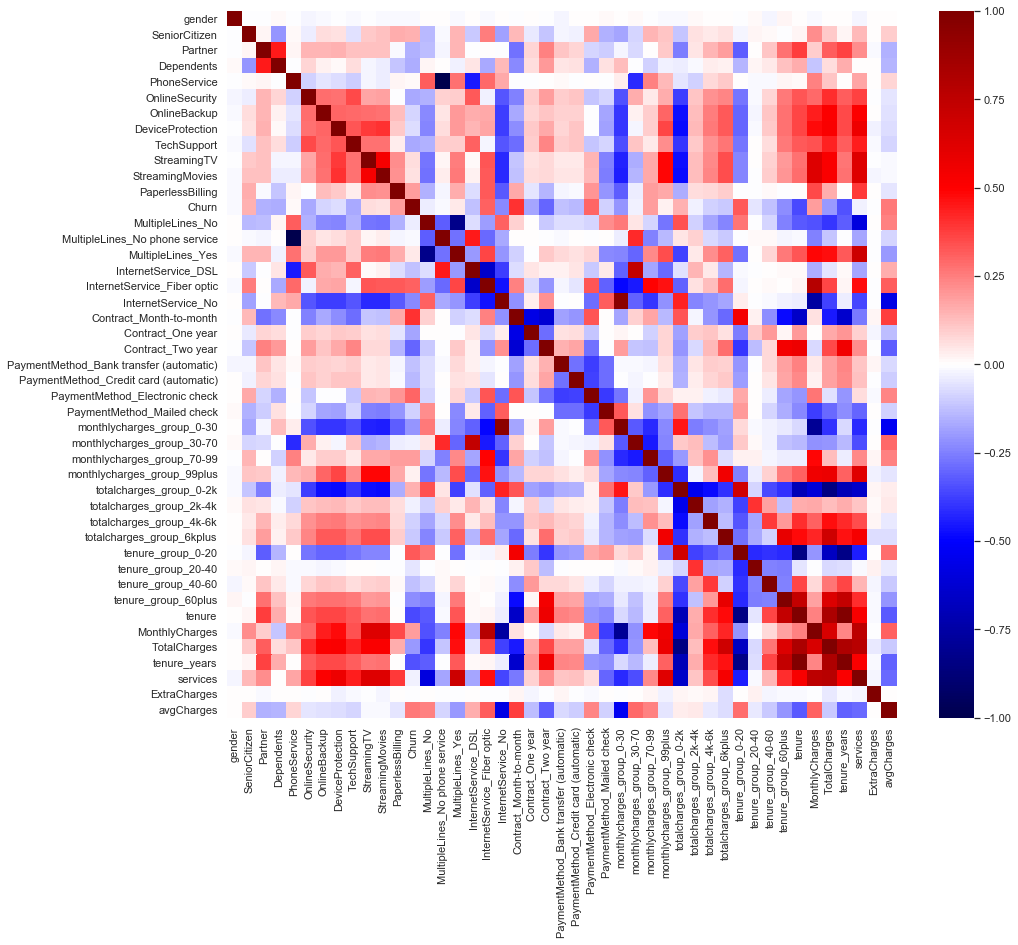

In [249]:
# Correlation Matrix for variables
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(df1.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

In [262]:
# drop 'customerID' column, feature not needed in model selection
df1 = df1.drop('customerID', axis=1)


In [263]:
# store df1 to csv file
df1.to_csv('df1.csv', index=False)

## Feature Selection

In [264]:
df1 = pd.read_csv('df1.csv')

In [265]:
X, y = df1.drop('Churn',axis=1), df1[['Churn']]

In [266]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'monthlycharges_group_0-30', 'monthlycharges_group_30-70',
       'monthlycharges_group_70-99', 'monthlycharges_group_99plus',
       'totalcharges_group_0-2k', 'totalcharges_group_2k-4k',
       'totalcharges_group_4k-6k', 'totalcharges_group_6kplus',
       'tenure_group_0-20', 'tenure_group_20-40', 'tenure_group_40-60',
       'tenure_group_60plus', 

### Feature impotance with LightGBM

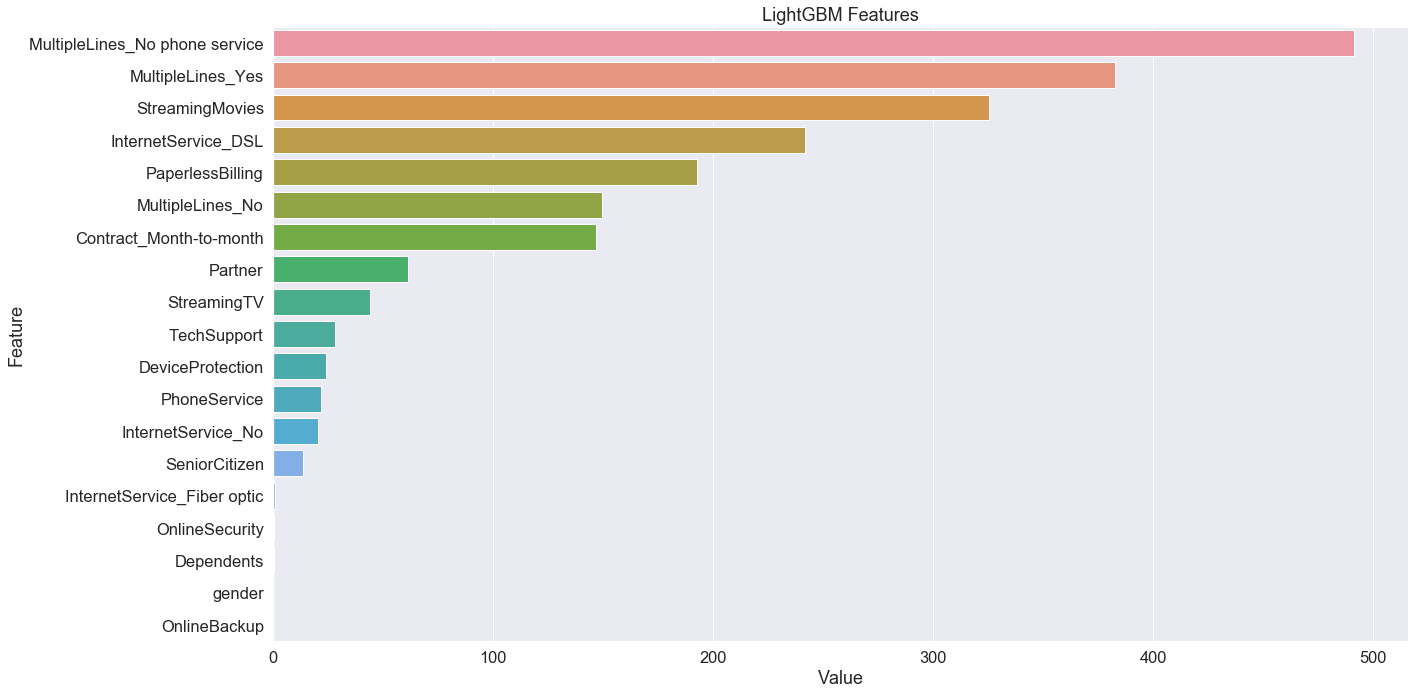

In [267]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [271]:
df_corr = df1[df1.columns[0:]].corr()["Churn"][:]
np.abs(df_corr).sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
tenure                                     0.354049
tenure_years                               0.340311
tenure_group_0-20                          0.320336
InternetService_Fiber optic                0.307463
Contract_Two year                          0.301552
PaymentMethod_Electronic check             0.301455
avgCharges                                 0.259694
InternetService_No                         0.227578
tenure_group_60plus                        0.226078
monthlycharges_group_0-30                  0.209602
TotalCharges                               0.199484
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
monthlycharges_group_70-99                 0.188186
Contract_One year                          0.178225
OnlineSecurity                             0.171270
TechSupport                                0.164716
Dependents  

In [272]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'monthlycharges_group_0-30', 'monthlycharges_group_30-70',
       'monthlycharges_group_70-99', 'monthlycharges_group_99plus',
       'totalcharges_group_0-2k', 'totalcharges_group_2k-4k',
       'totalcharges_group_4k-6k', 'totalcharges_group_6kplus',
       'tenure_group_0-20', 'tenure_group_20-40', 'tenure_group_40-60',
       'tenure_group_60plus', 'tenure',

In [273]:
y.columns

Index(['Churn'], dtype='object')

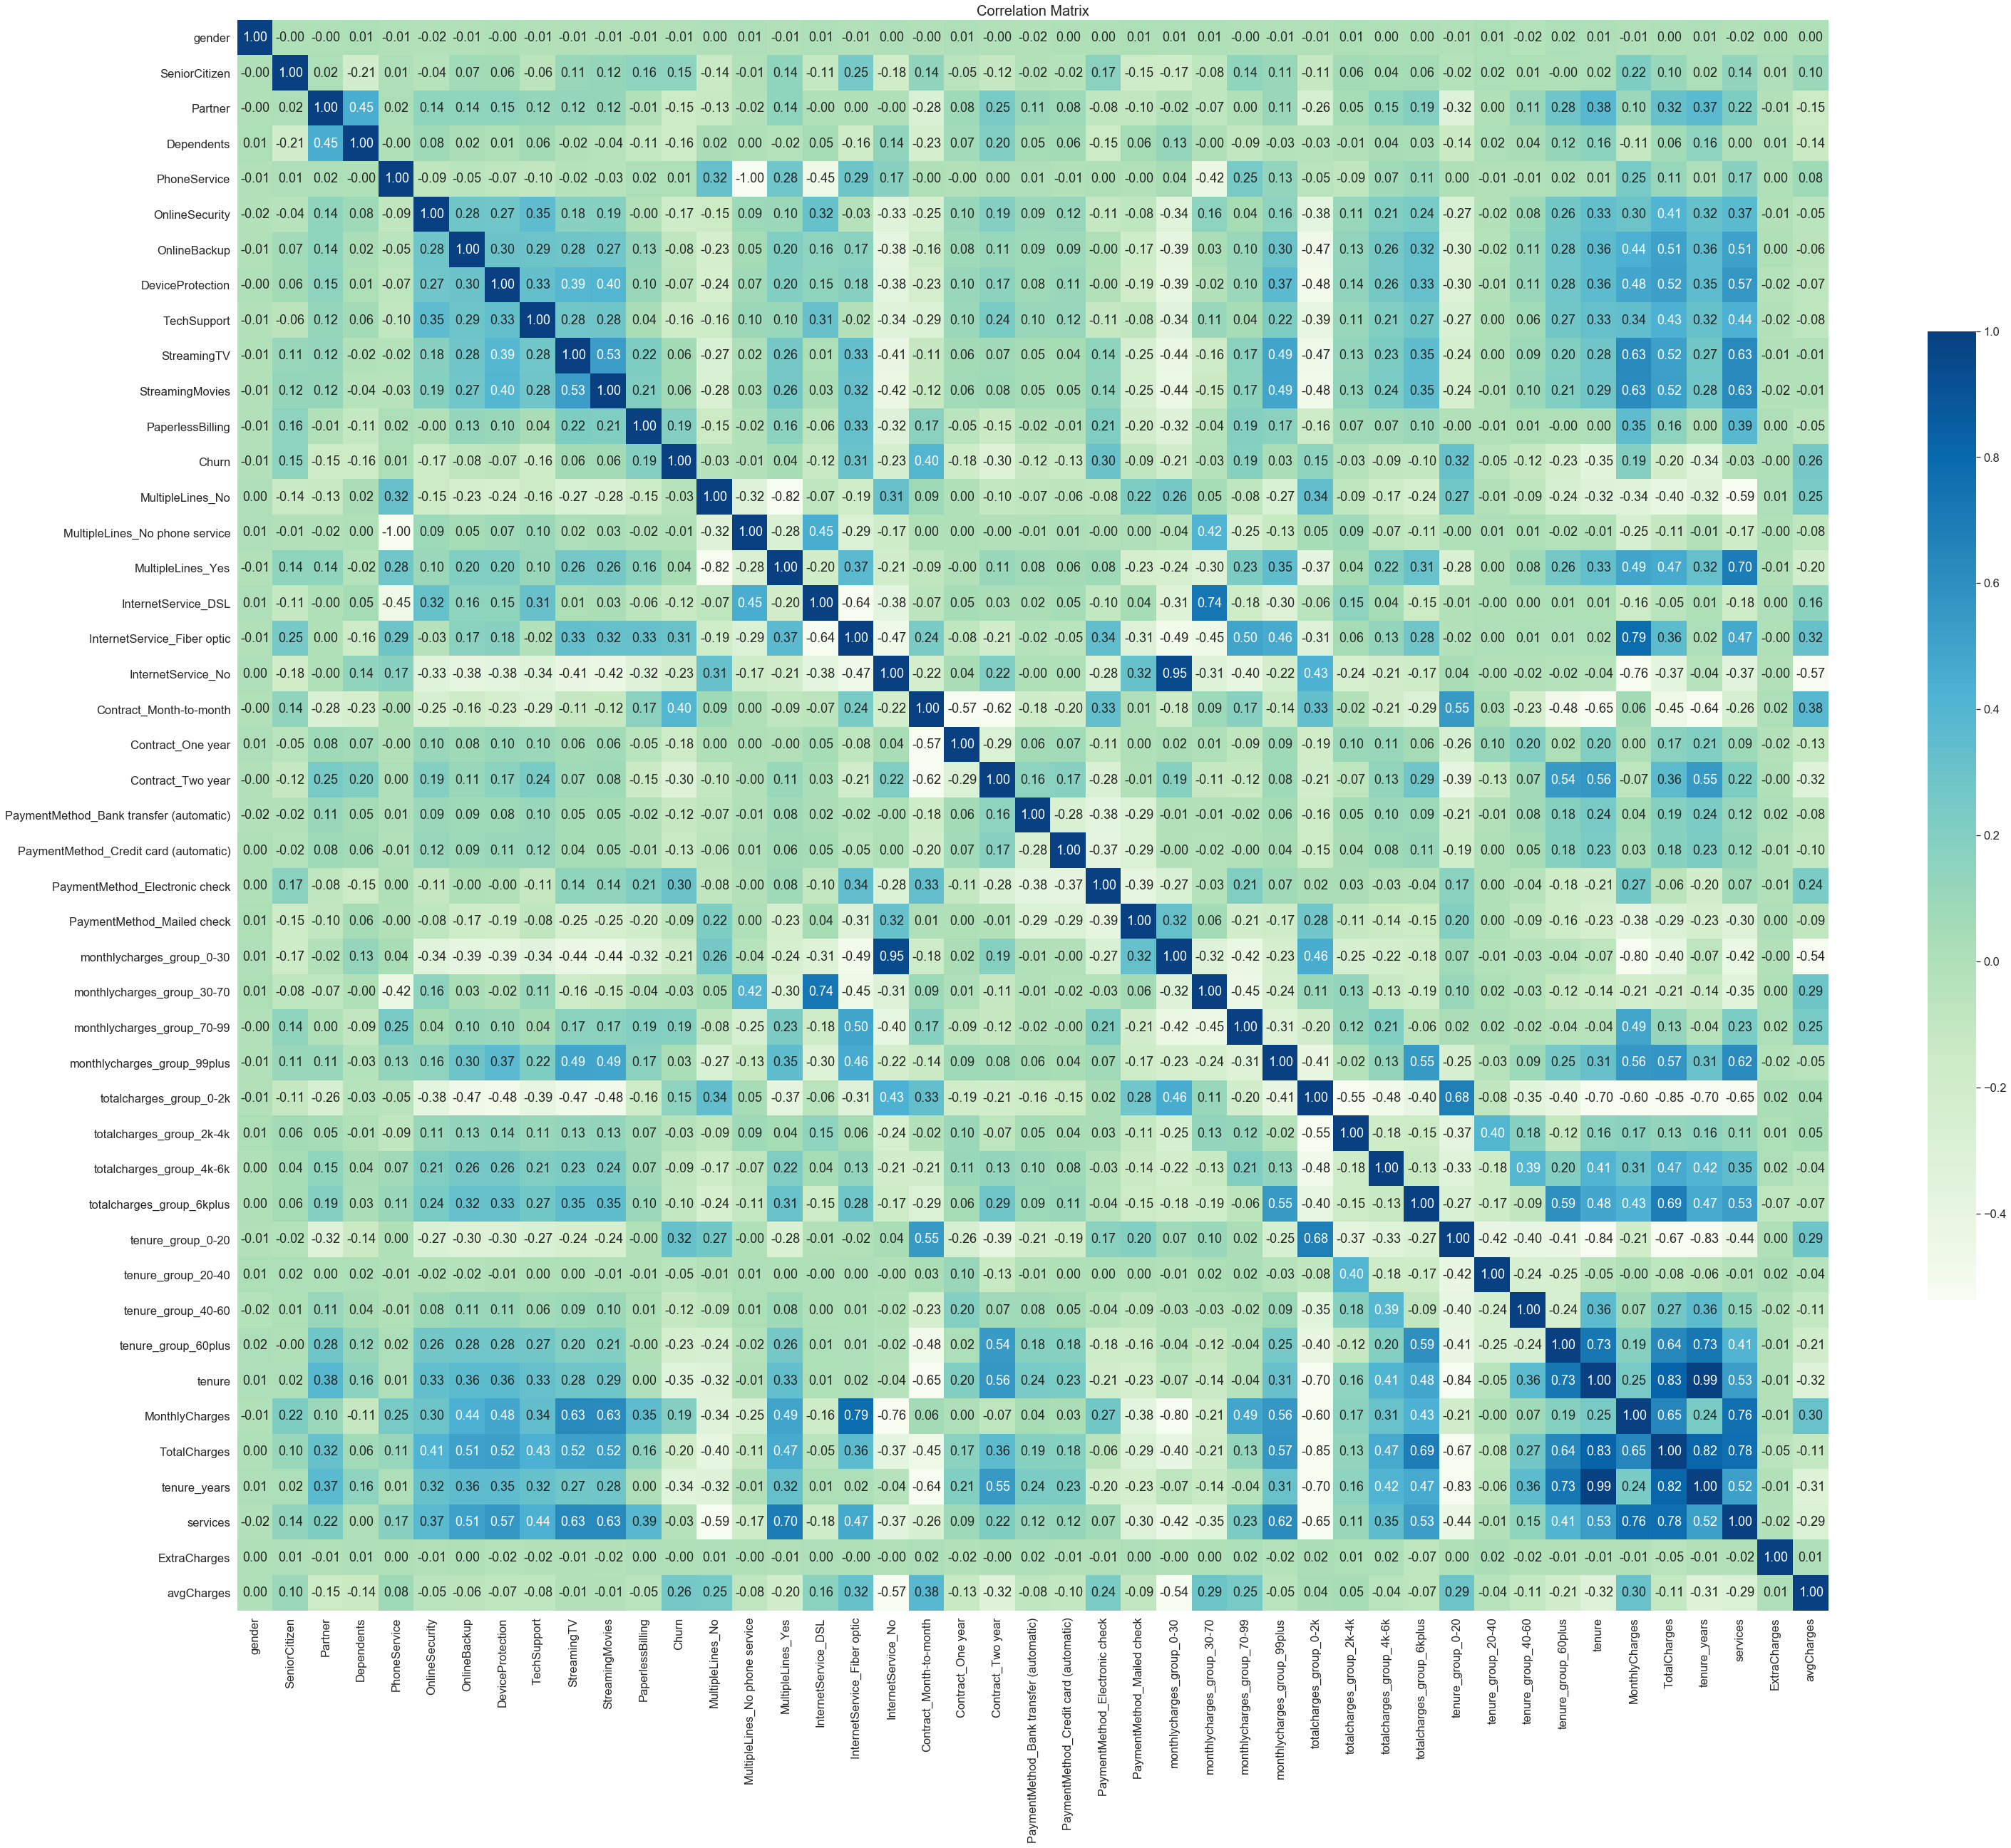

In [277]:
correlation_matrix = df1.corr()
plt.figure(figsize=(50, 50))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

# Model Buliding

## we will comapare Naive Bayes with Logistic Regression we used in assignment 1 

In [278]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [279]:
X.shape

(7032, 44)

In [280]:
y.shape

(7032, 1)

In [281]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [282]:
X_train.shape

(4922, 44)

In [283]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4886
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1994.2
Date:                Fri, 24 Apr 2020   Deviance:                       3988.3
Time:                        21:33:30   Pearson chi2:                 4.97e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9154      0.274     -3.344      0.001      -1.452      -0.379
gender                                     -0.0030      0.079     -0.038      0.970      -0.159       0.153
SeniorCitizen                               0.2406      0.103      2.340      0.019       0.039       0.442
Partner                                     0.1766      0.095      1.851      0.064      -0.010       0.364
Dependents                                 -0.2425      0.111     -2.182      0.029      -0.460      -0.025
PhoneService                               -0.0354      0.213     -0.166      0.868      -0.453       0.382
OnlineSecurity                             -0.2872      0.127     -2.258      0.024      -0.536      -0.038
OnlineBackup                               -0.0221      0.121     -0.184      0.854      -0.258       0.214
DeviceProtection                            0.0439      0.122      0.360      0.719      -0.195       0.283
TechSupport                                -0.2385      0.130     -1.829      0.067      -0.494       0.017
StreamingTV                                 0.6666      0.291      2.288      0.022       0.096       1.238
StreamingMovies                             0.6666      0.294      2.264      0.024       0.090       1.244
PaperlessBilling                           -0.0455      0.148     -0.307      0.759      -0.336       0.245
MultipleLines_No                           -0.0669      0.130     -0.516      0.606      -0.321       0.187
MultipleLines_No phone service             -0.8800      0.479     -1.838      0.066      -1.818       0.058
MultipleLines_Yes                           0.0315      0.106      0.298      0.766      -0.176       0.239
InternetService_DSL                        -0.2038      0.120     -1.700      0.089      -0.439       0.031
InternetService_Fiber optic                 2.1387      0.901      2.372      0.018       0.372       3.906
InternetService_No                         -2.8503      1.205     -2.365      0.018      -5.212      -0.488
Contract_Month-to-month                     0.4759      0.132      3.617      0.000       0.218       0.734
Contract_One year                          -0.3916      0.132     -2.974      0.003      -0.650      -0.134
Contract_Two year                          -0.9997      0.171     -5.842      0.000      -1.335      -0.664
PaymentMethod_Bank transfer (automatic)    -0.1920      0.107     -1.790      0.073      -0.402       0.018
PaymentMethod_Credit card (automatic)      -0.3486      0.109     -3.194      0.001      -0.562      -0.135
PaymentMethod_Electronic check             -0.0229      0.092     -0.248      0.805      -0.204       0.158
PaymentMethod_Mailed check                 -0.3519      0.1